# Plotting different traces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from JUSUFlike.Project.Codes.processing_results import *
from IPython.display import Image
import tvb_model_reference.src.nuu_tools_simulation_human as tools
from sklearn.cluster import KMeans
from scipy import signal

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']

/home/master/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


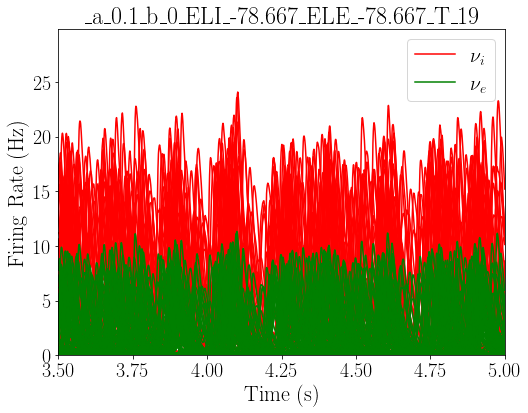

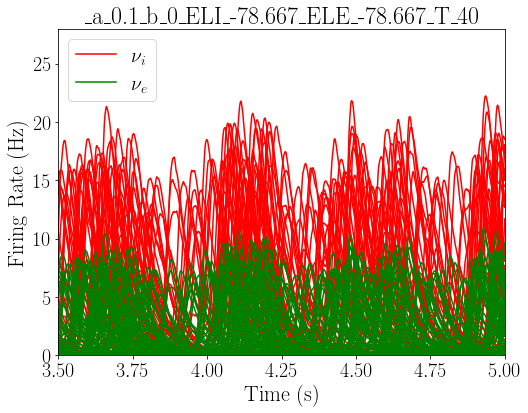

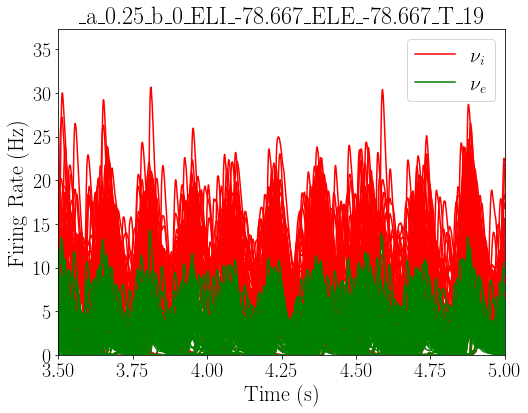

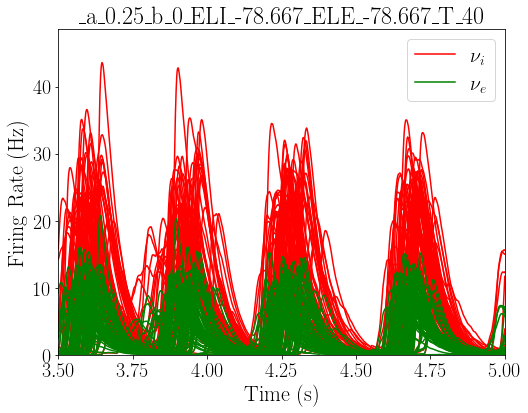

KeyboardInterrupt: 

In [3]:
coeff_inh = 1
E_L_i = -78.667
E_L_e = -78.667
run_sim = 5000.0
cut_transient = 2000.0
ELS = f'ELI_{E_L_i}_ELE_{E_L_e}'
folder_results = f'/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh{coeff_inh}/' \
+ ELS + '/'
folder_figures = '/home/master/Desktop/tests_hpc/figures/parameter_plotting/'
for file in os.scandir(folder_results):
    # Then the sweeps
    name = file.name
    result = tools.get_result(file.path, cut_transient, run_sim)
    time_s = result[0][0] * 1e-3  # from ms to sec

    # Decide which one to analyze since they usually exhibit very similar behavior
    FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(time_s, FR_inh[:], c='r')
    ax.plot(time_s, FR_exc[:], c='g')
    ax.plot([], [], label='$\\nu_i$', c='r')
    ax.plot([], [], label='$\\nu_e$', c='g')
    ax.legend(loc='best')
    ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
           xlim=(3.5, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
    fig.savefig(folder_figures + name + '.png')
    plt.show()

In [ ]:
coeff_inh = 1
E_L_i = -78.667
E_L_e = -78.667
run_sim = 5000.0
cut_transient = 2000.0
ELS = f'ELI_{E_L_i}_ELE_{E_L_e}'
folder_results = f'/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh{coeff_inh}/' \
+ ELS + '/'
folder_figures = '/home/master/Desktop/tests_hpc/figures/parameter_plotting/'
for file in os.scandir(folder_results):
    # Then the sweeps
    name = file.name
    if '_a_0_' in name:
        result = tools.get_result(file.path, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        W = result[0][1][:, 5, :]

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        ax = axes[0]
        ax.plot(time_s, FR_inh[:, 0], c='r')
        ax.plot(time_s, FR_exc[:, 0], c='g')
        ax.plot([], [], label='$\\nu_i$', c='r')
        ax.plot([], [], label='$\\nu_e$', c='g')
        ax.legend(loc='best')
        ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
               xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
        ax = axes[1]
        ax.plot(time_s, W[:, 0], c='y')
        ax.set_title('Excitatory adaptation')
        fig.savefig(folder_figures + name + '.png')
        plt.show()

# Plots for FENS Poster
What I want to do in this case is to plot the signals, PSD, FC and PLI of each of the already simulated points of the parameter space.

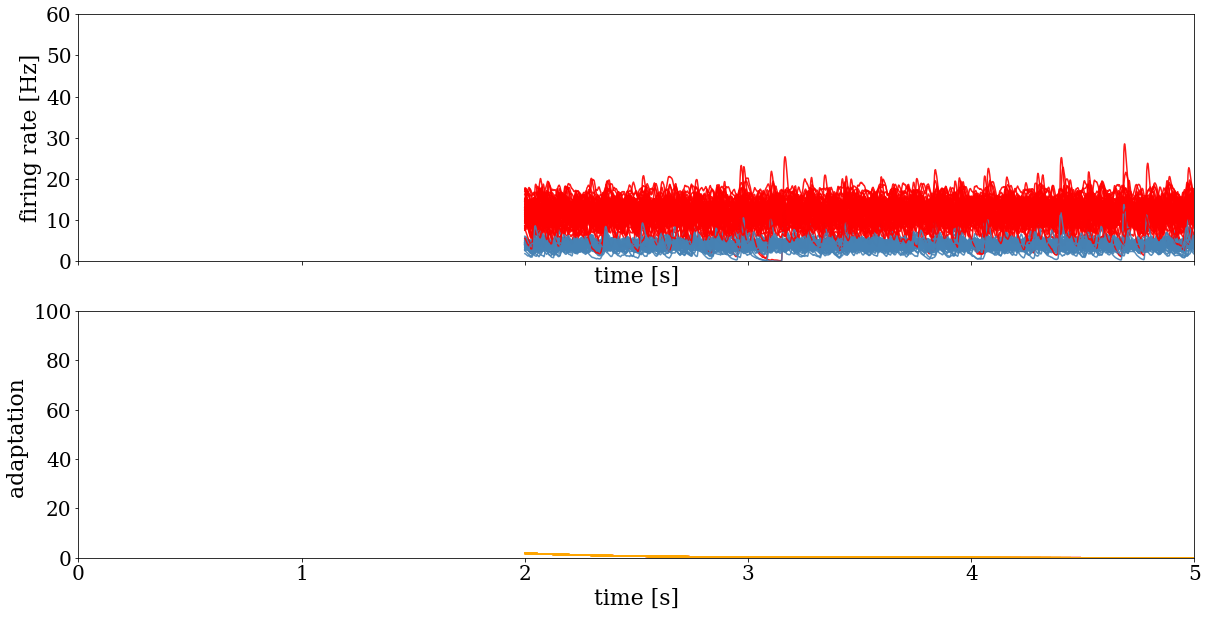

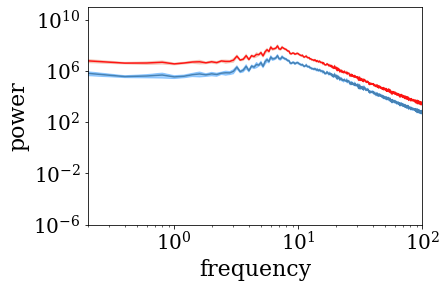

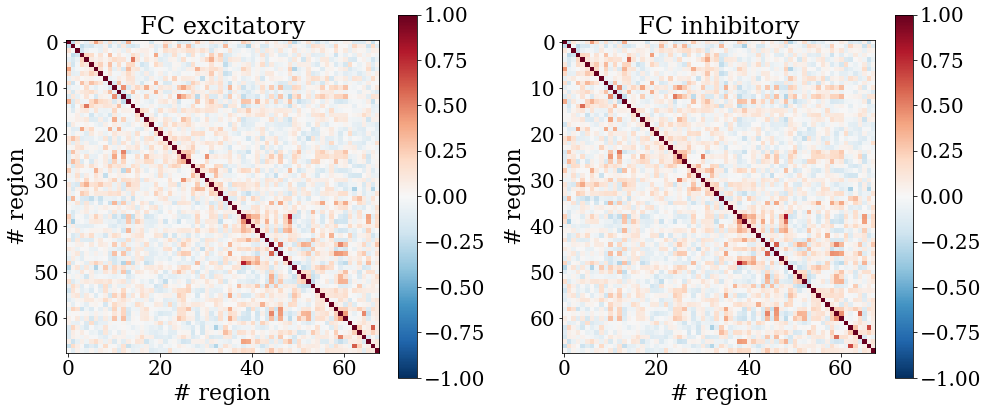

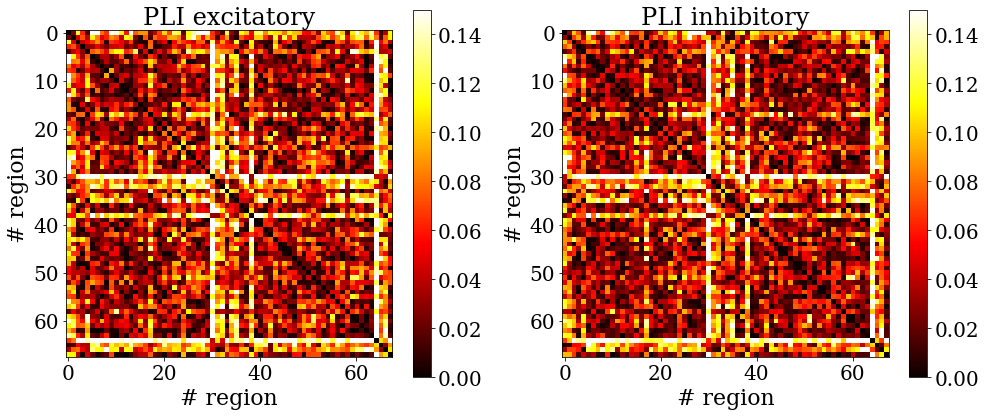

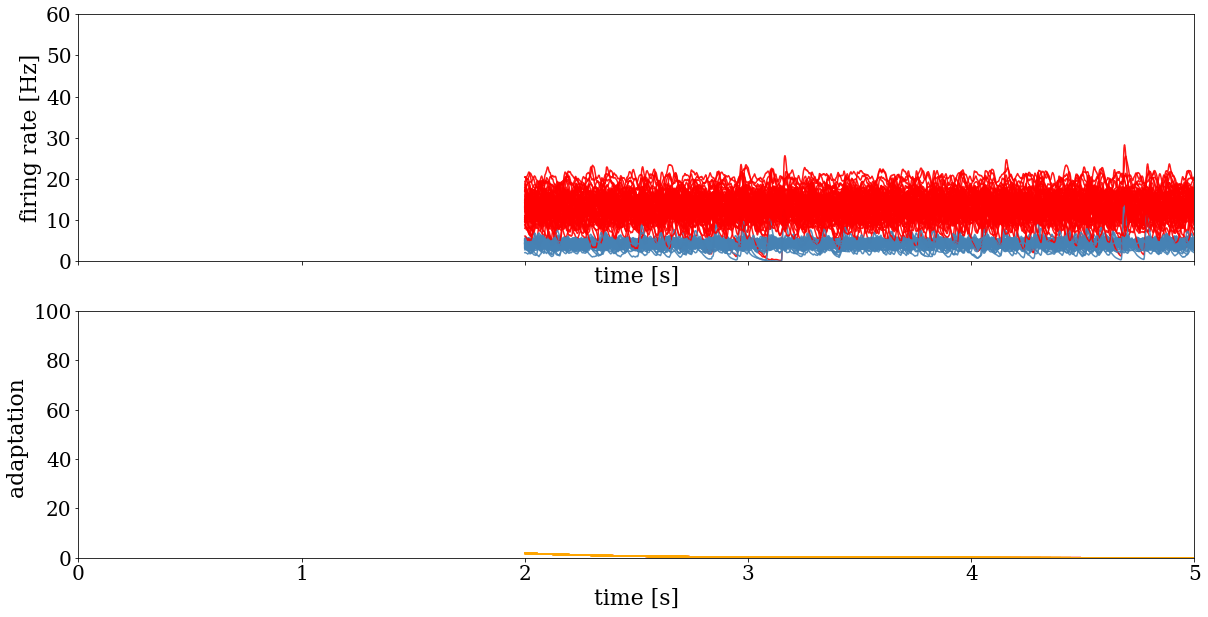

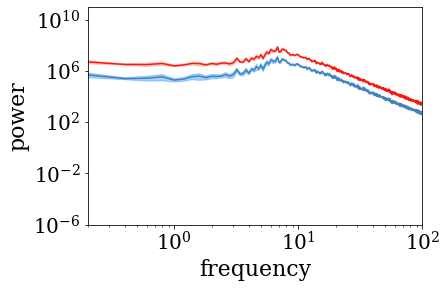

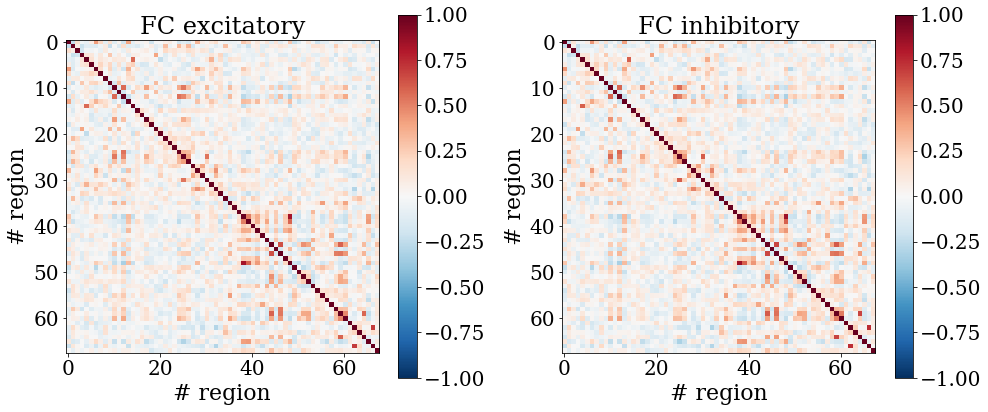

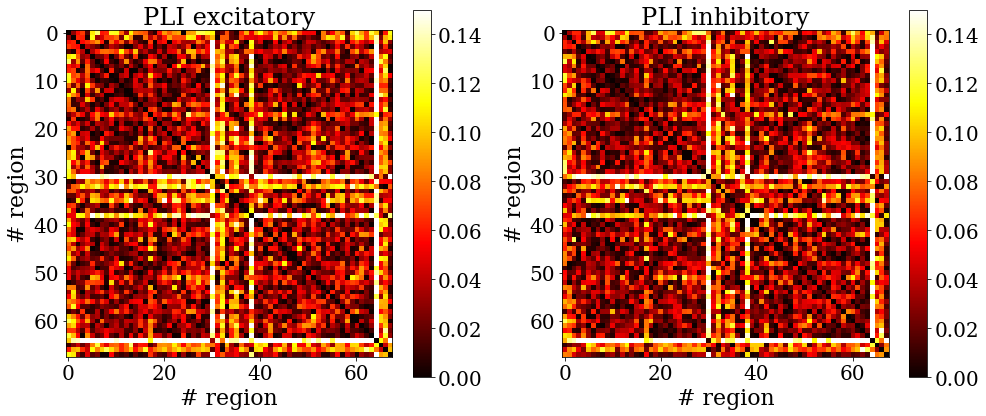

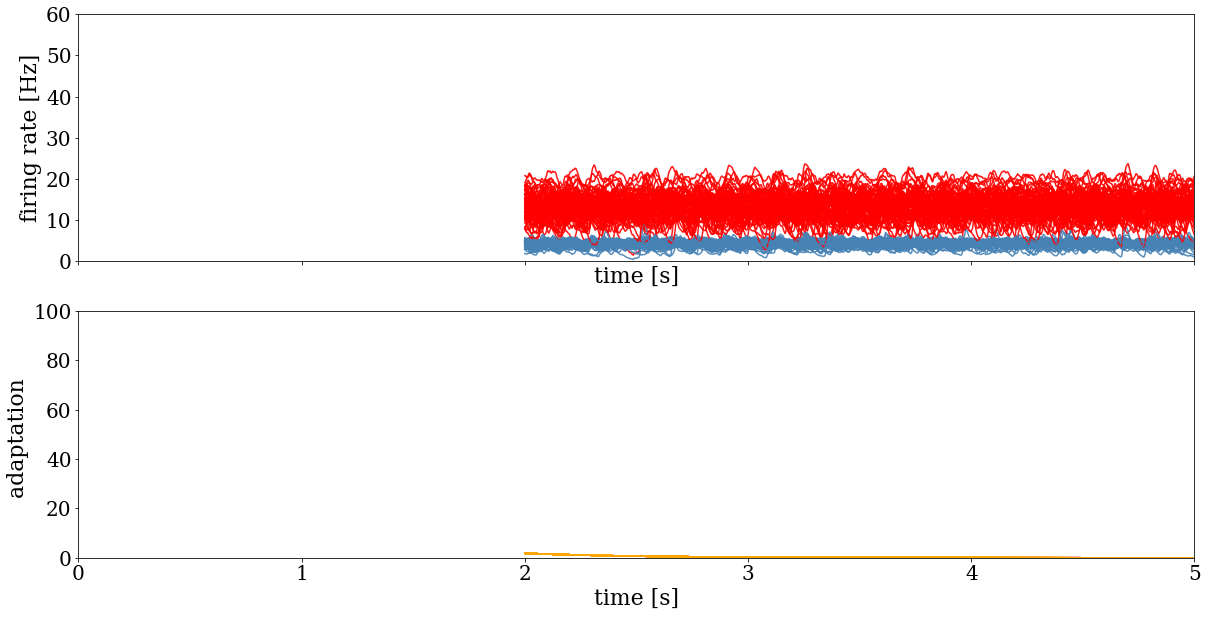

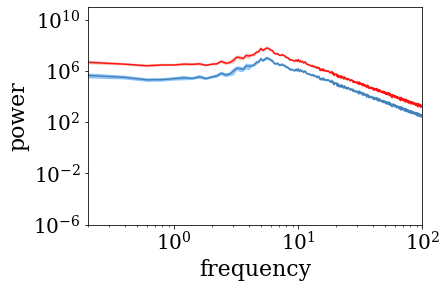

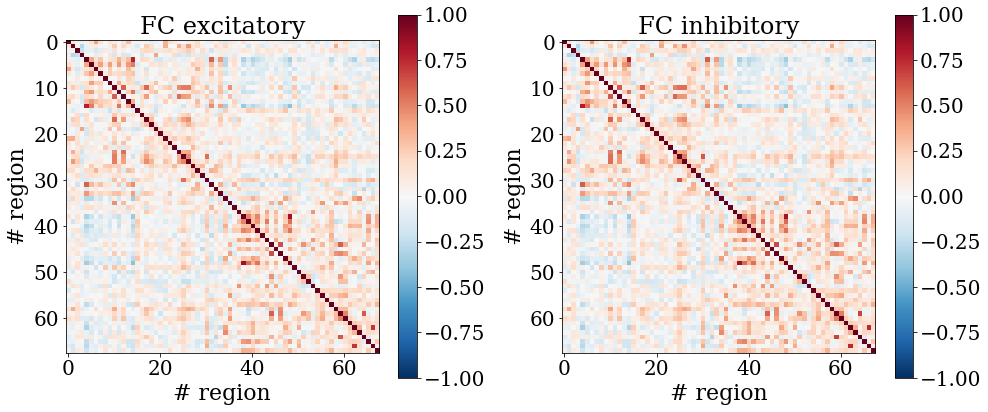

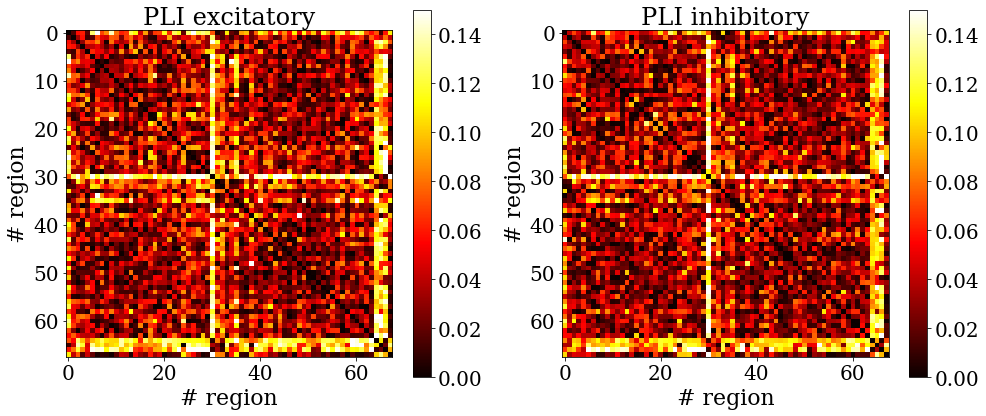

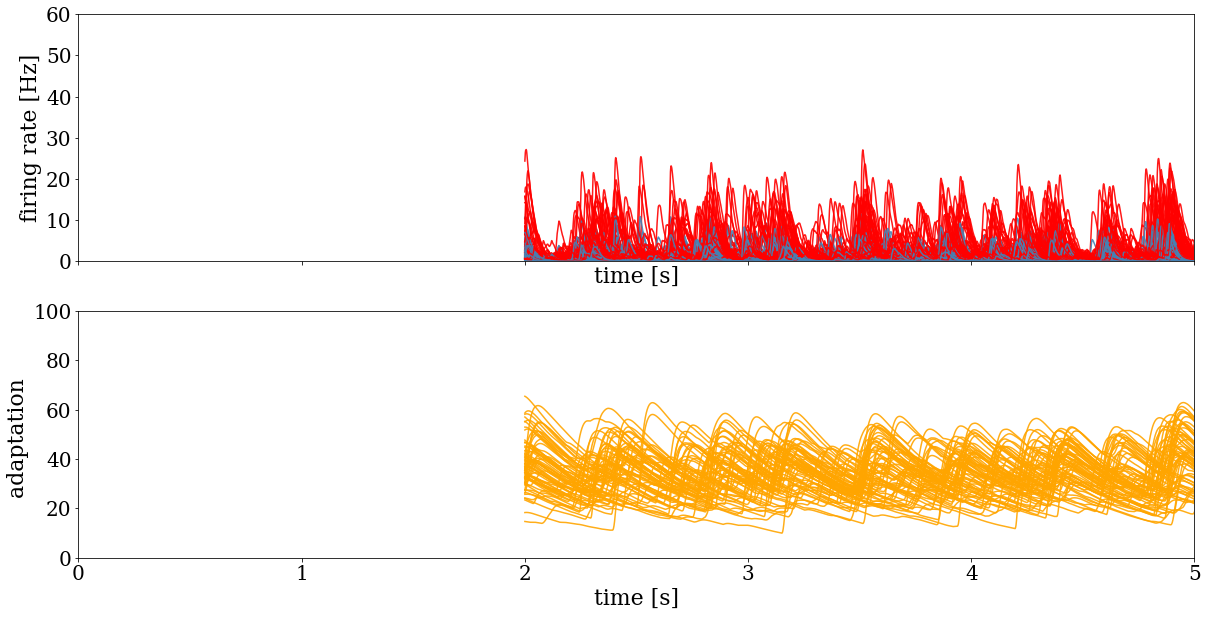

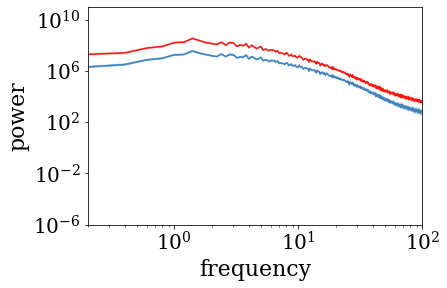

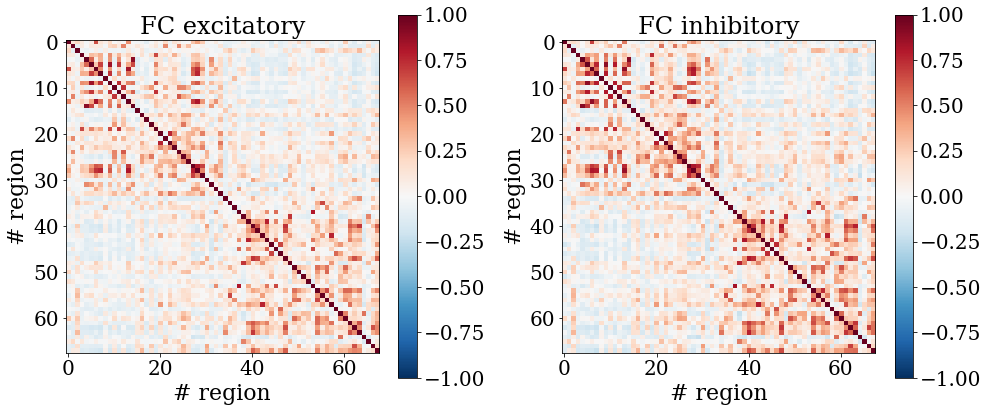

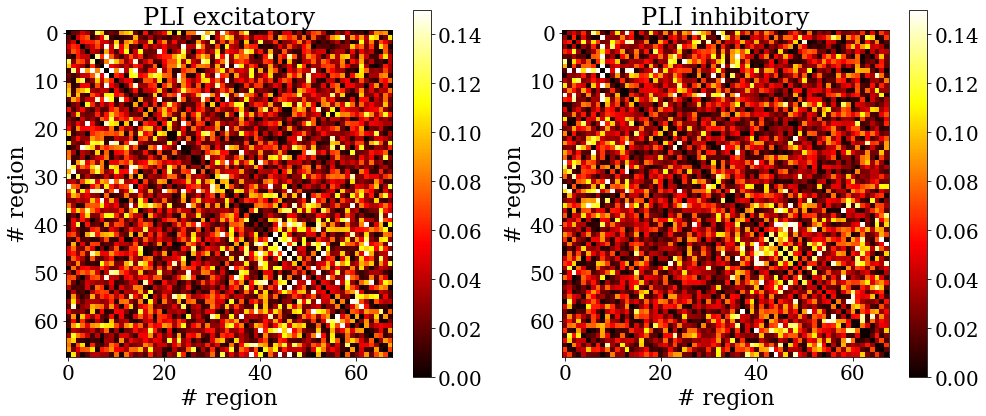

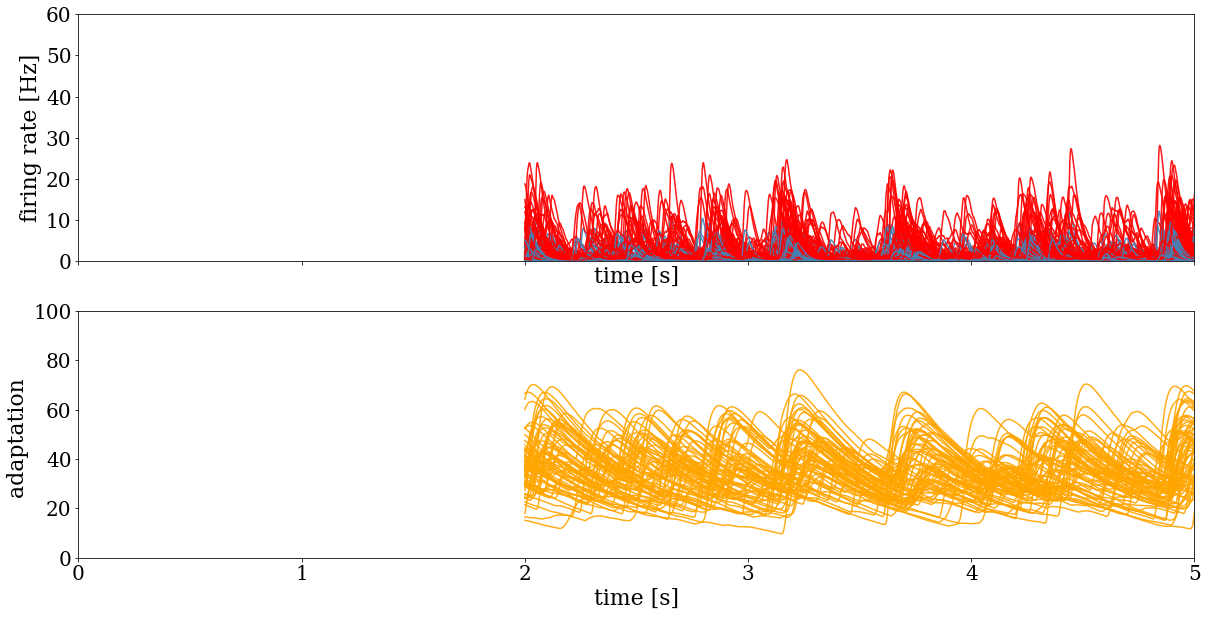

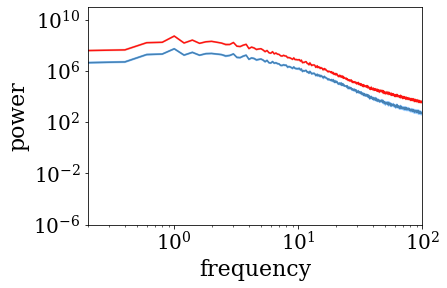

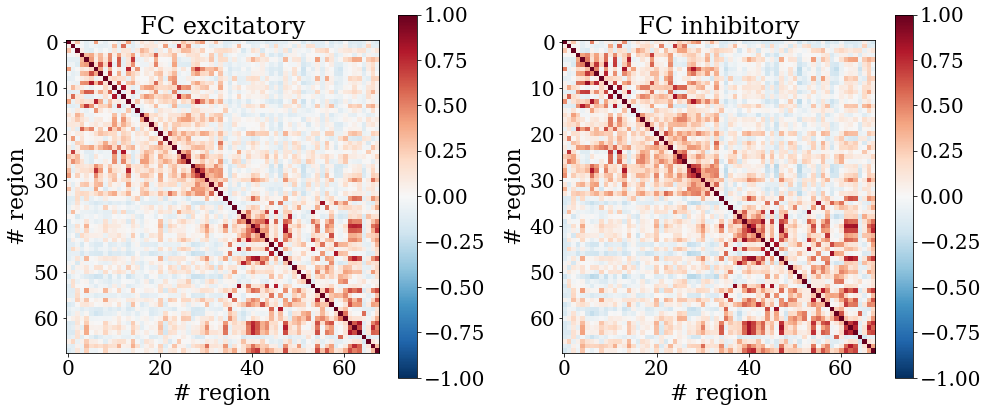

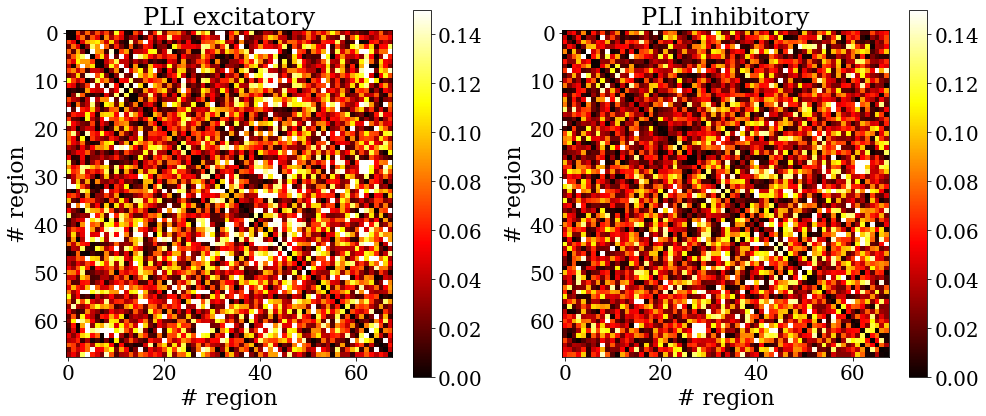

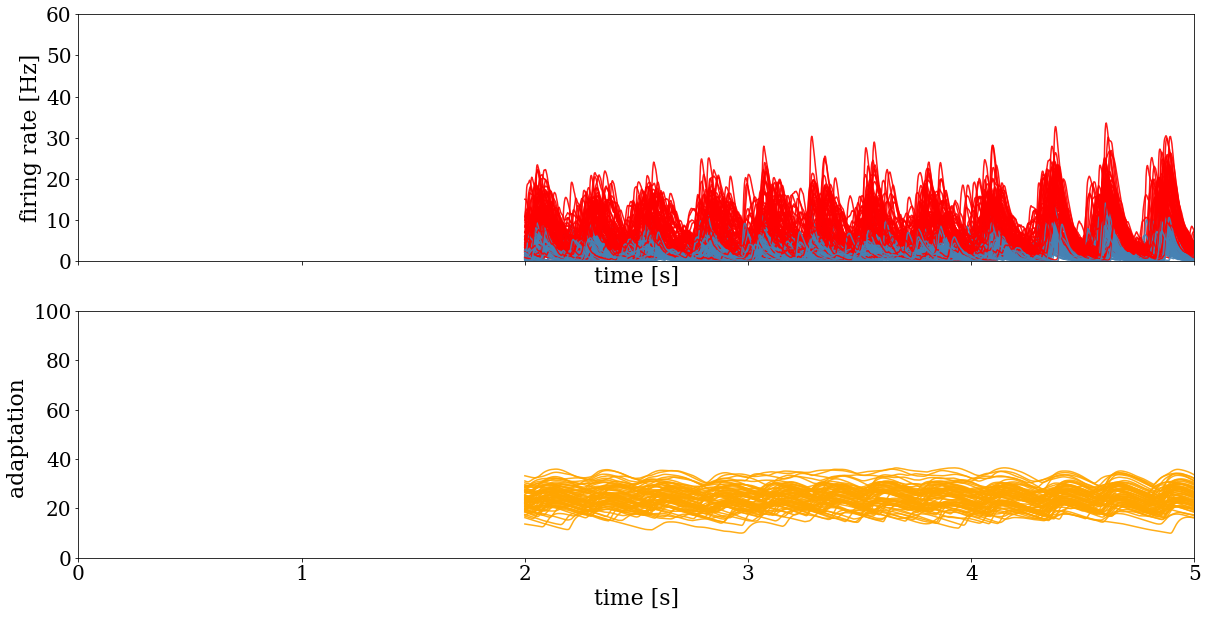

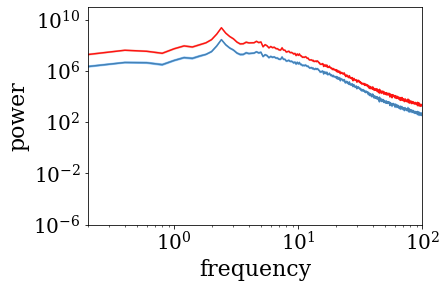

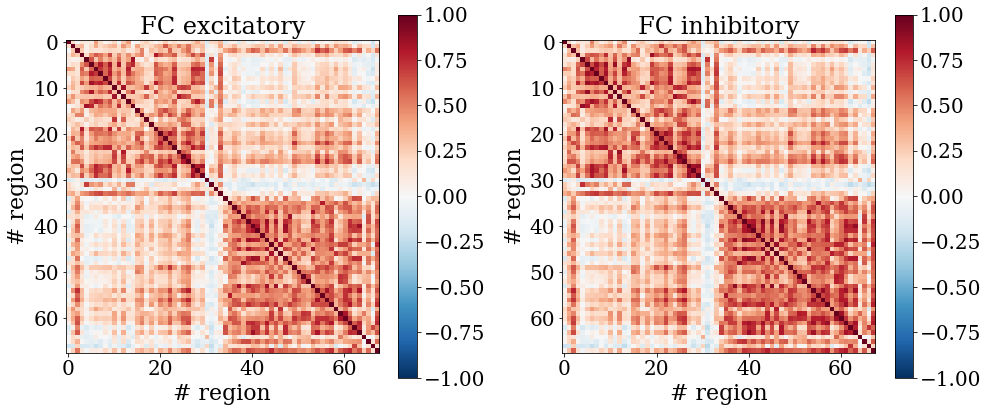

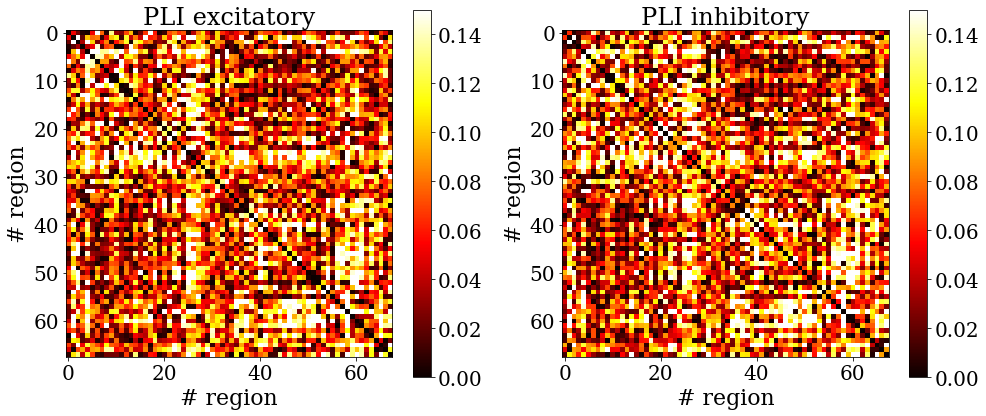

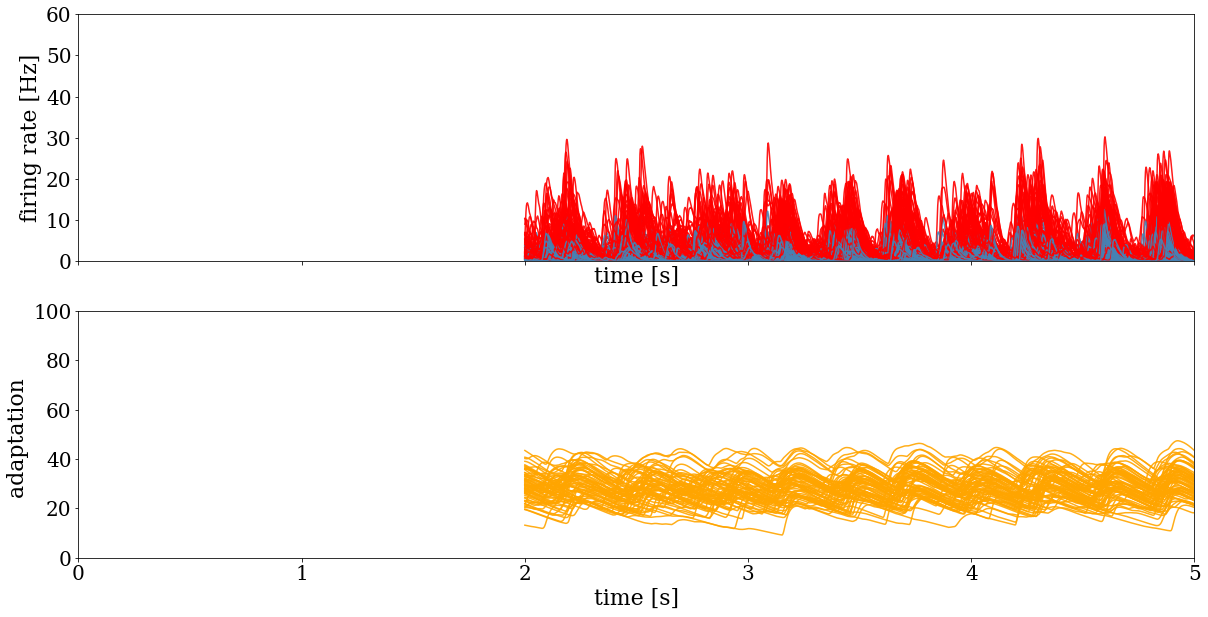

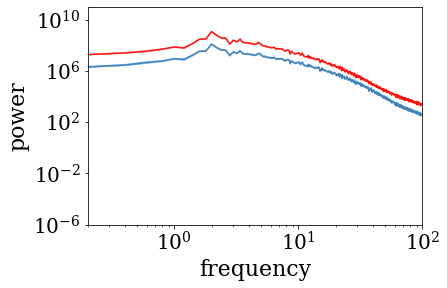

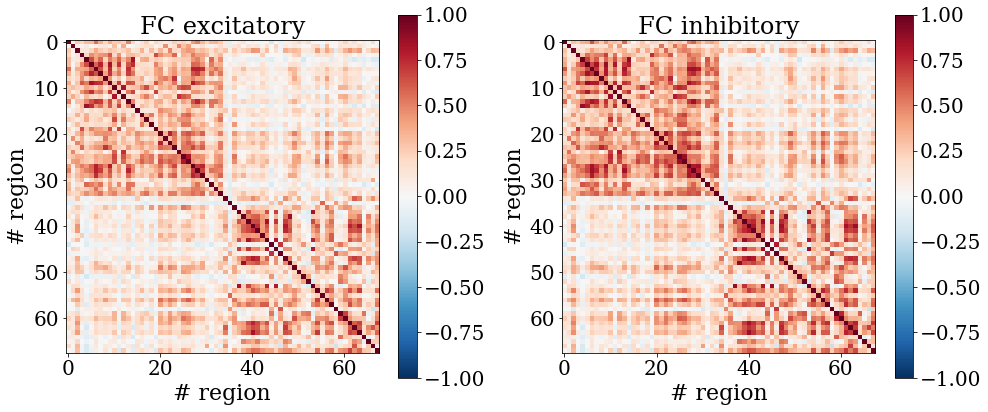

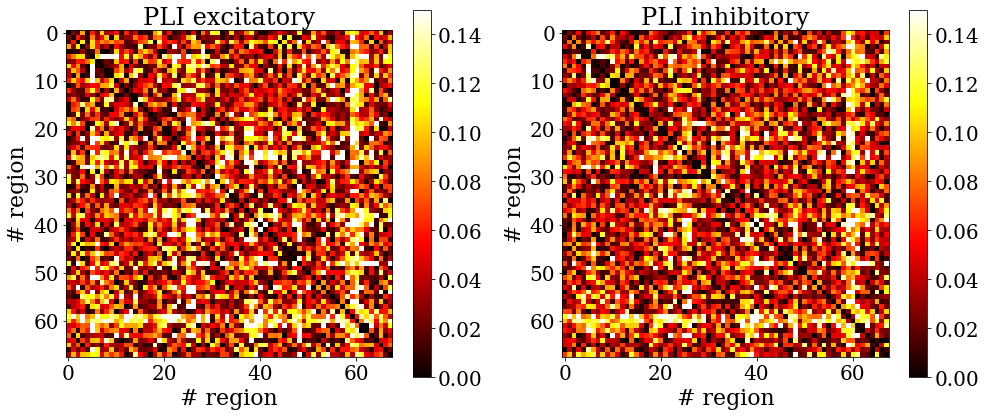

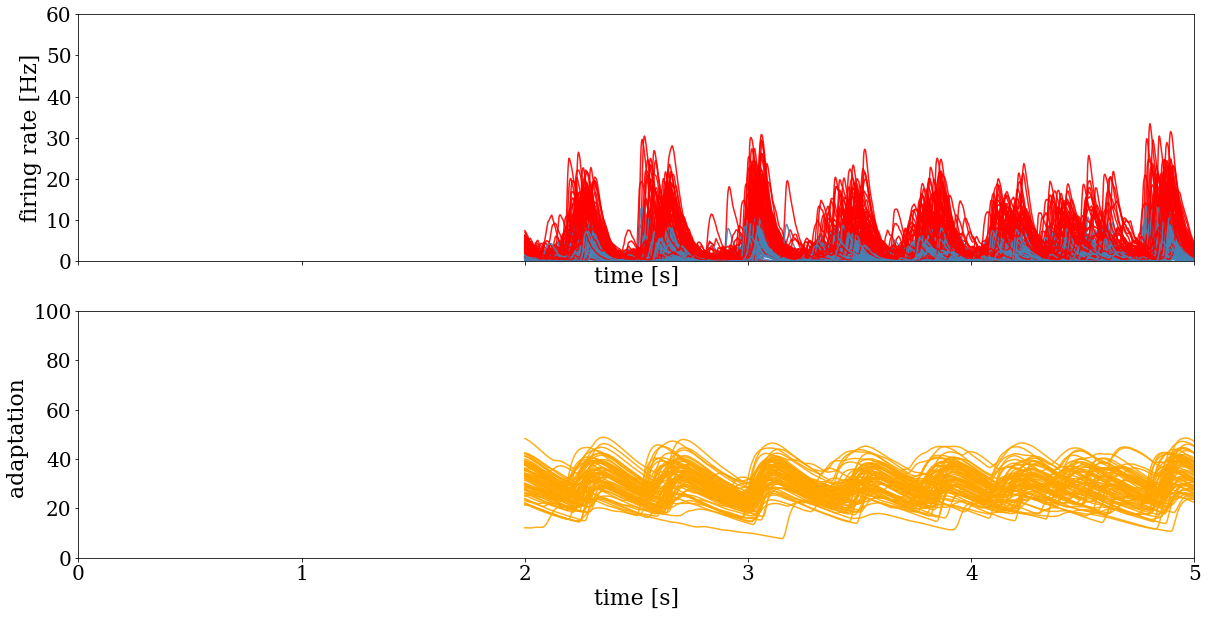

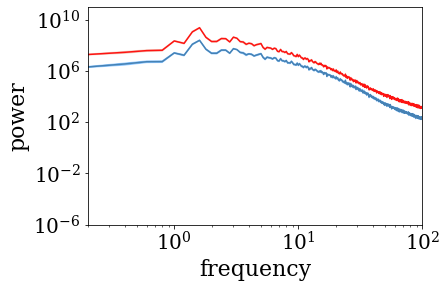

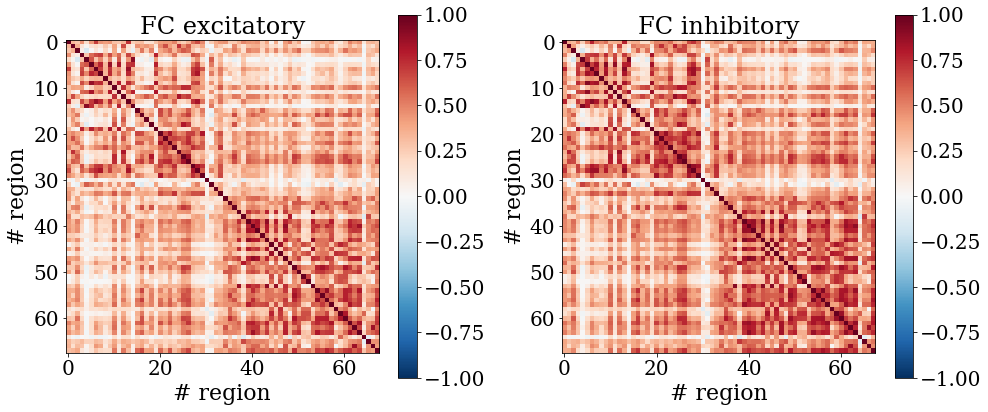

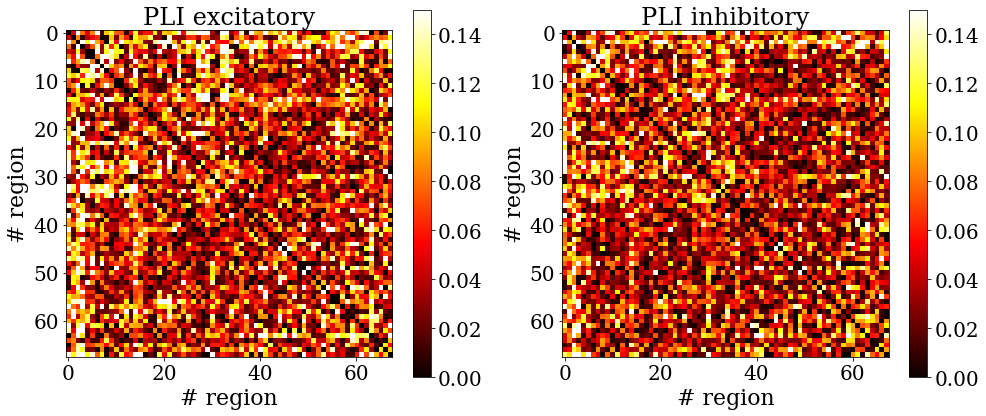

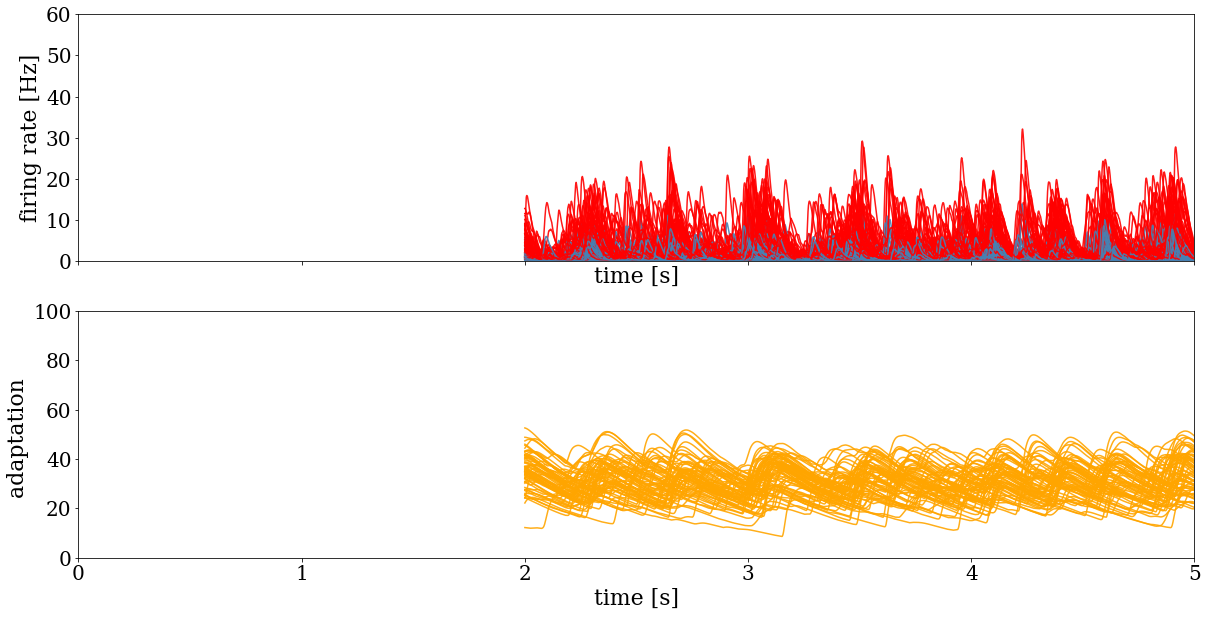

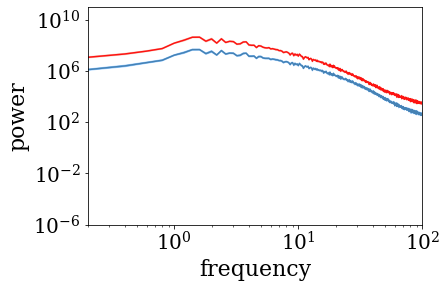

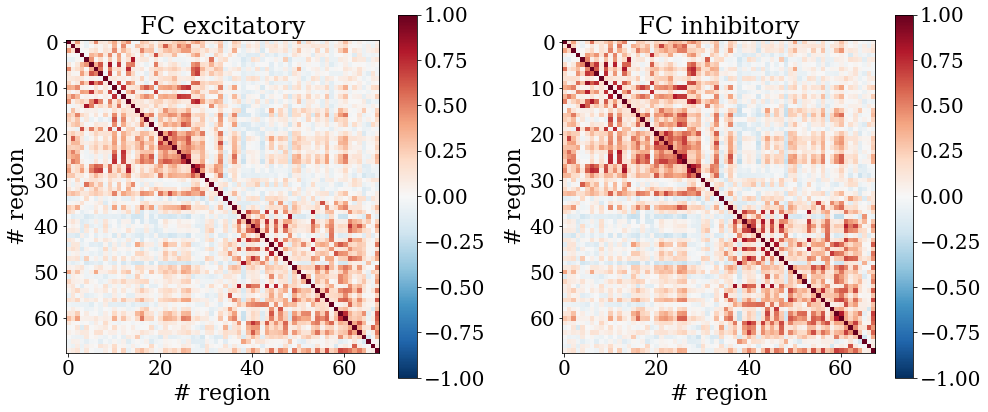

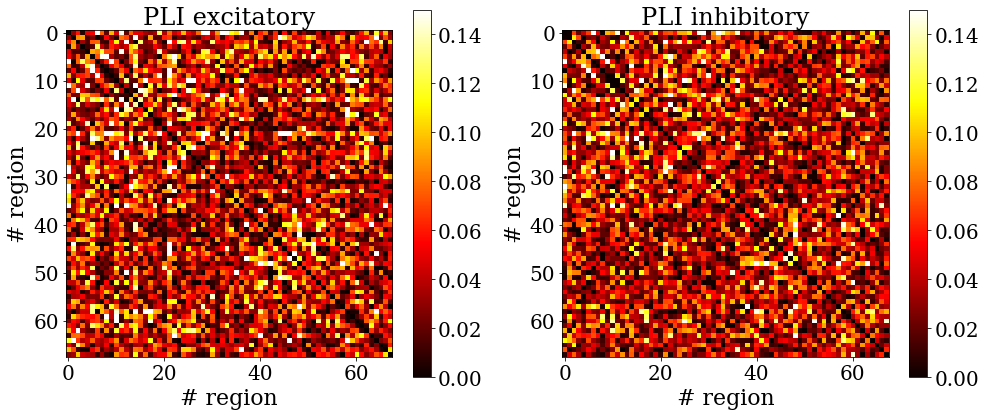

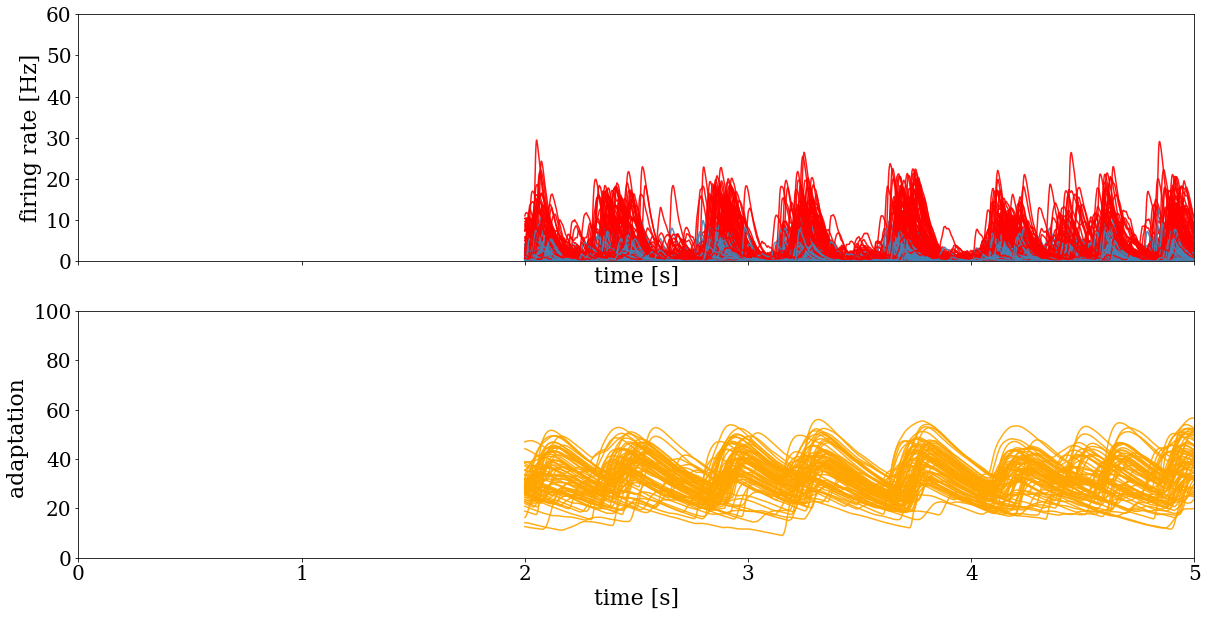

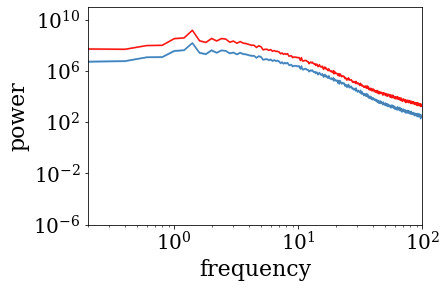

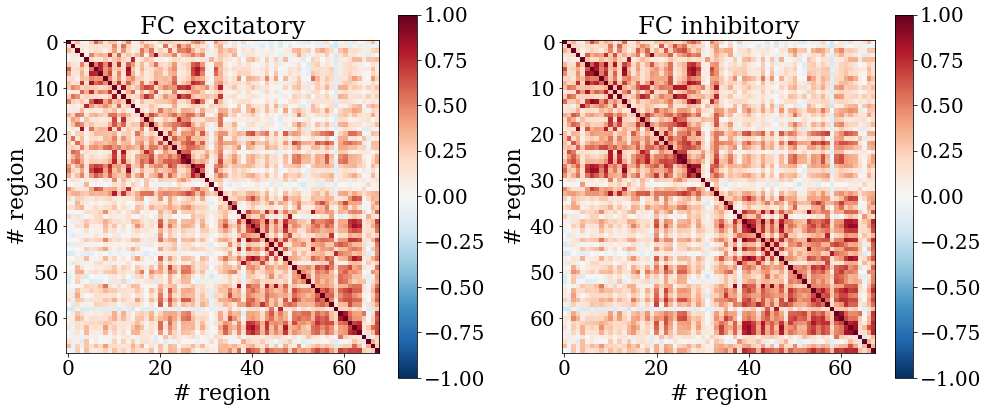

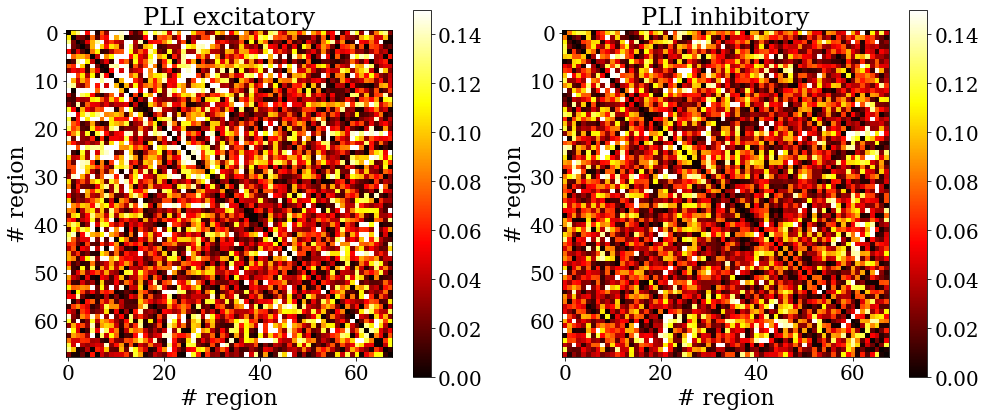

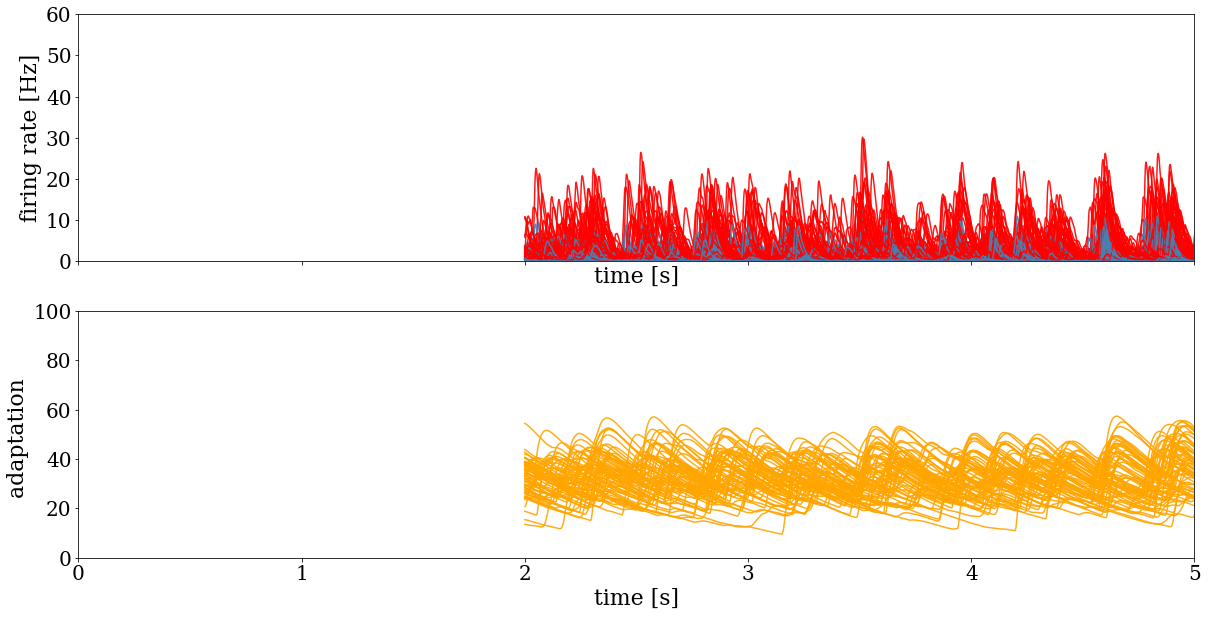

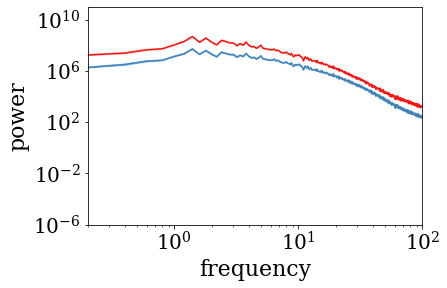

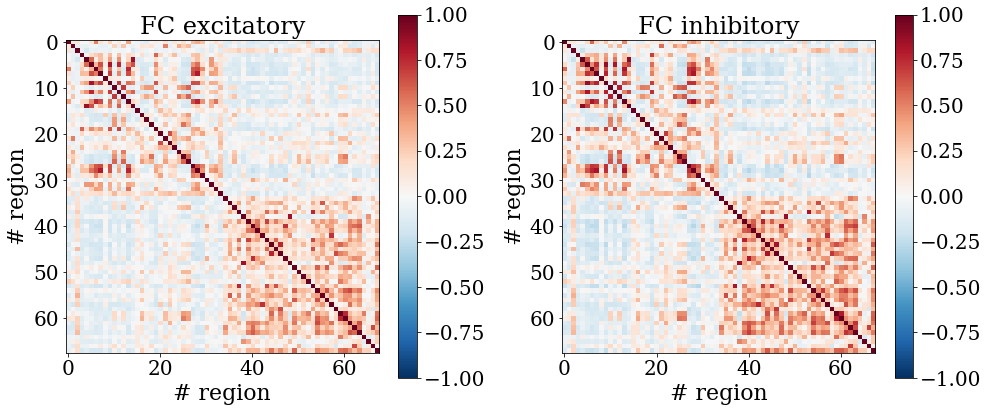

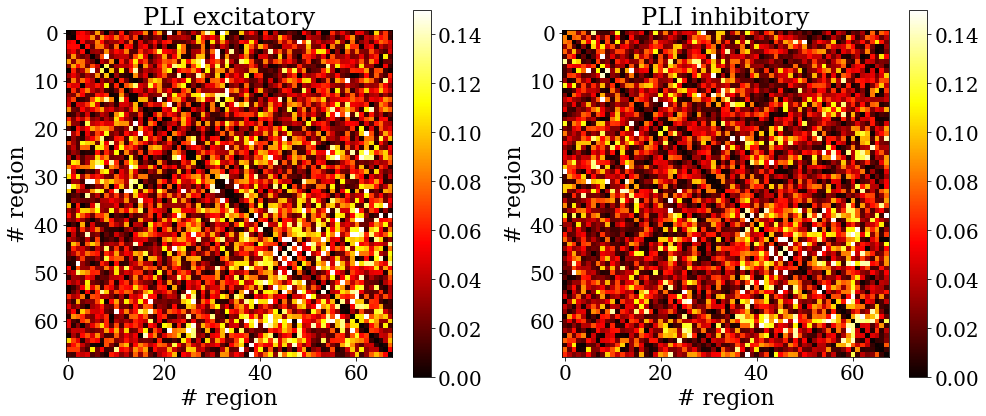

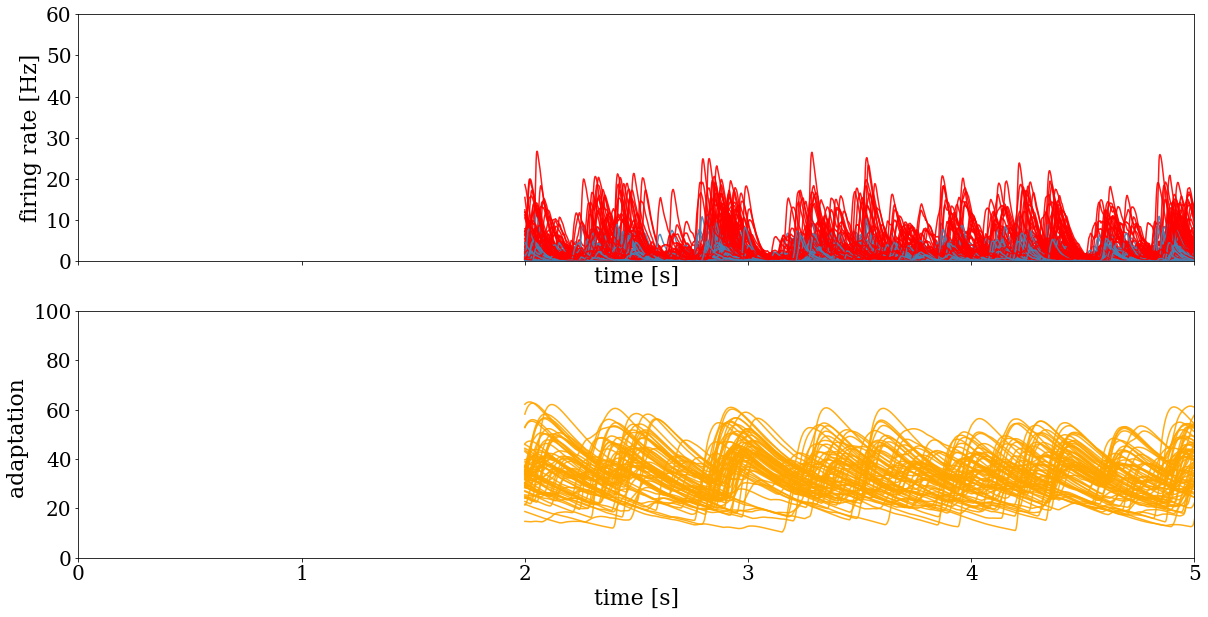

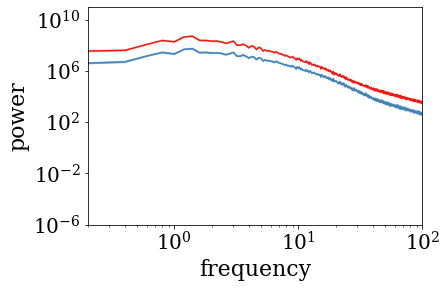

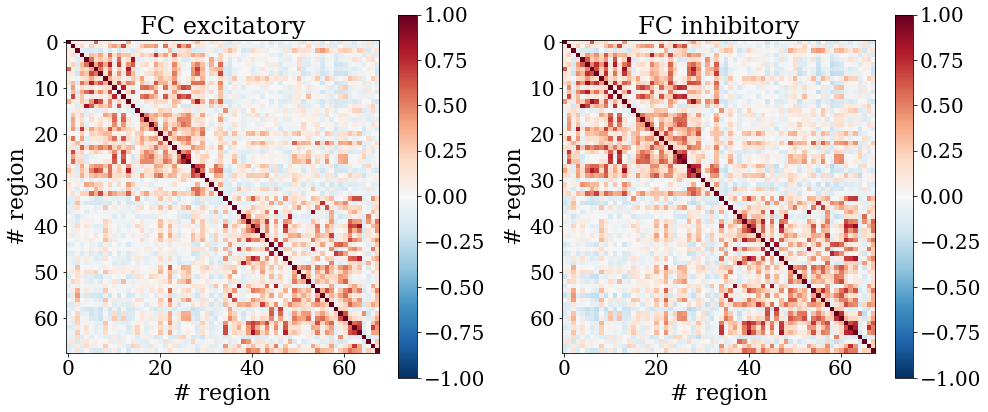

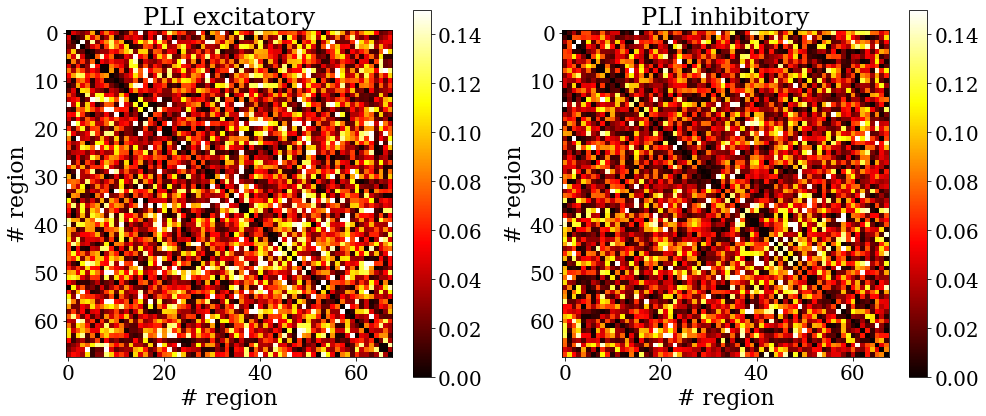

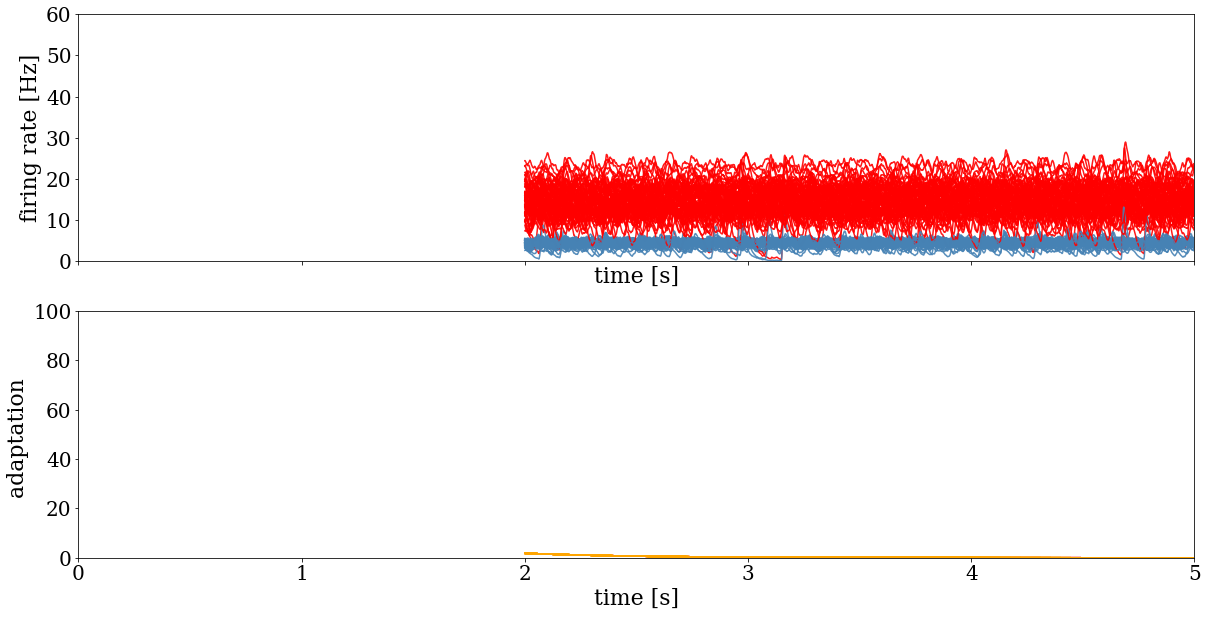

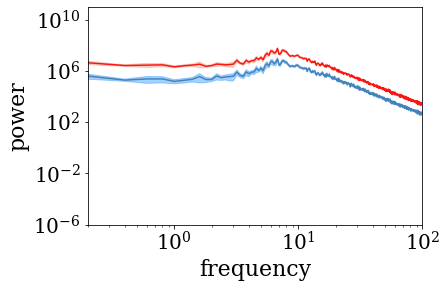

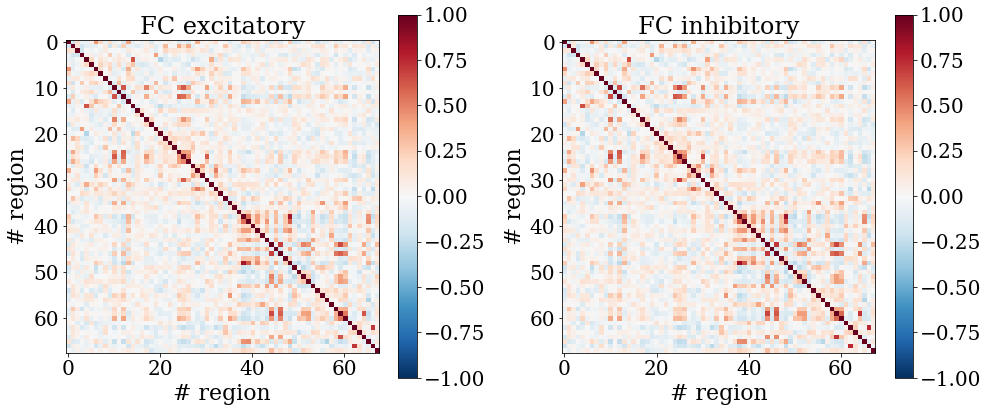

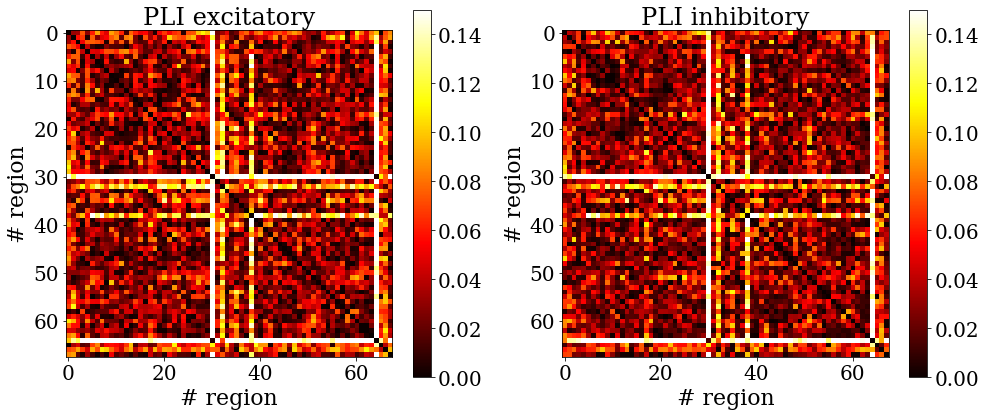

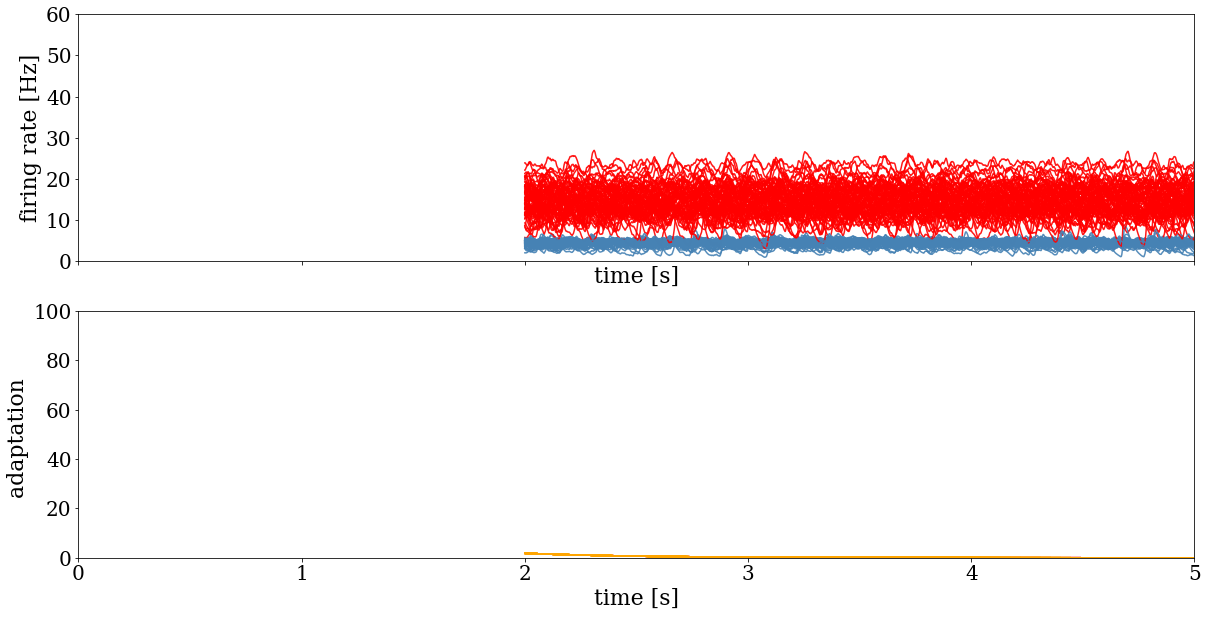

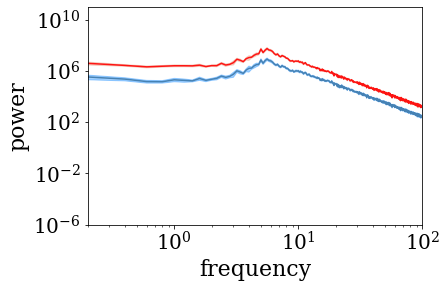

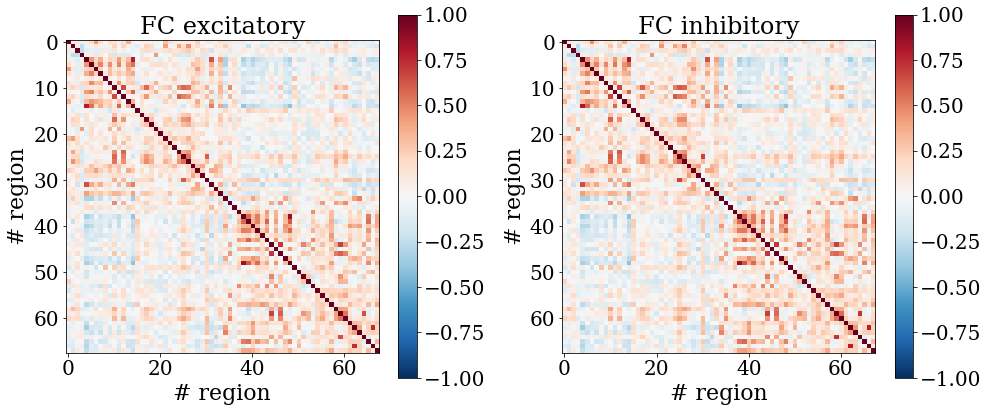

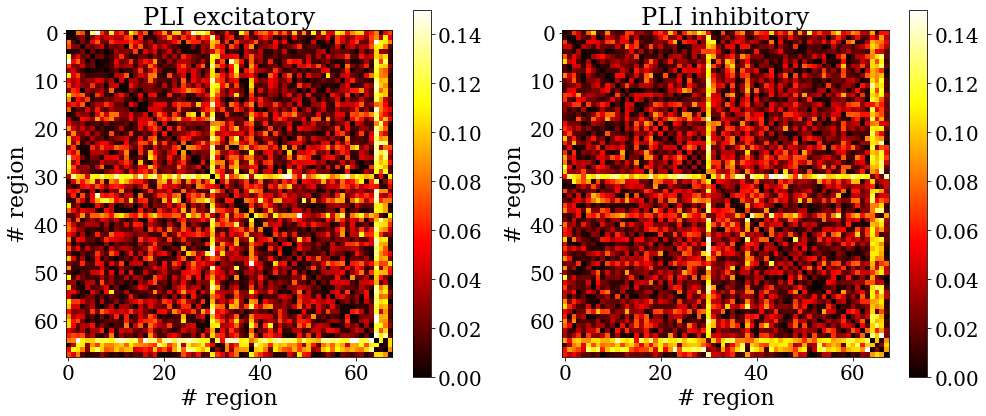

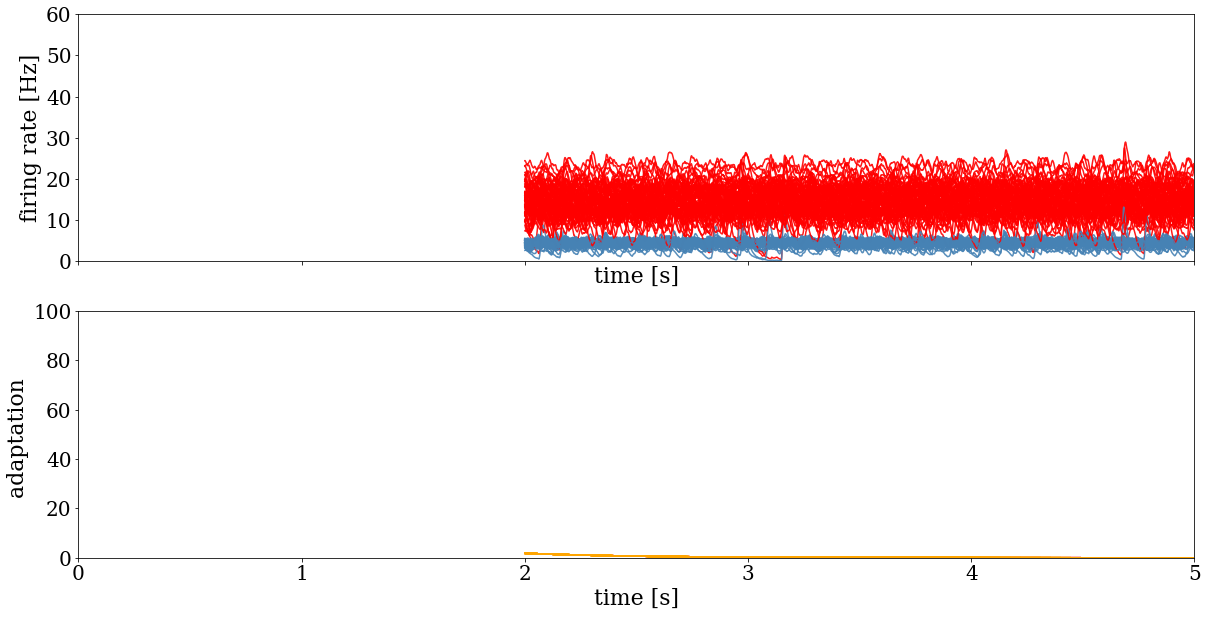

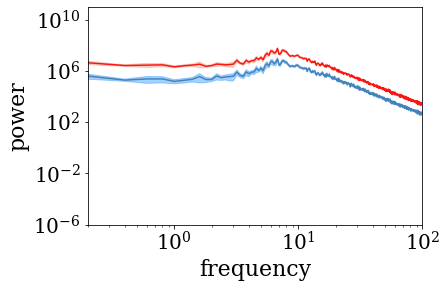

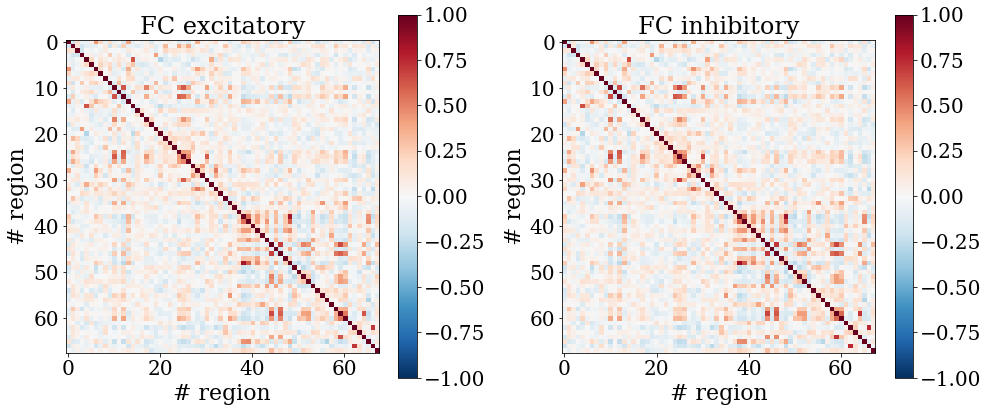

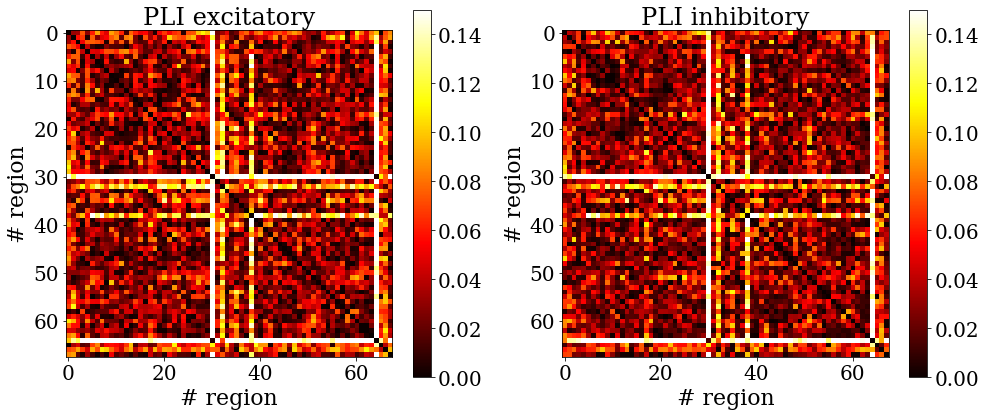

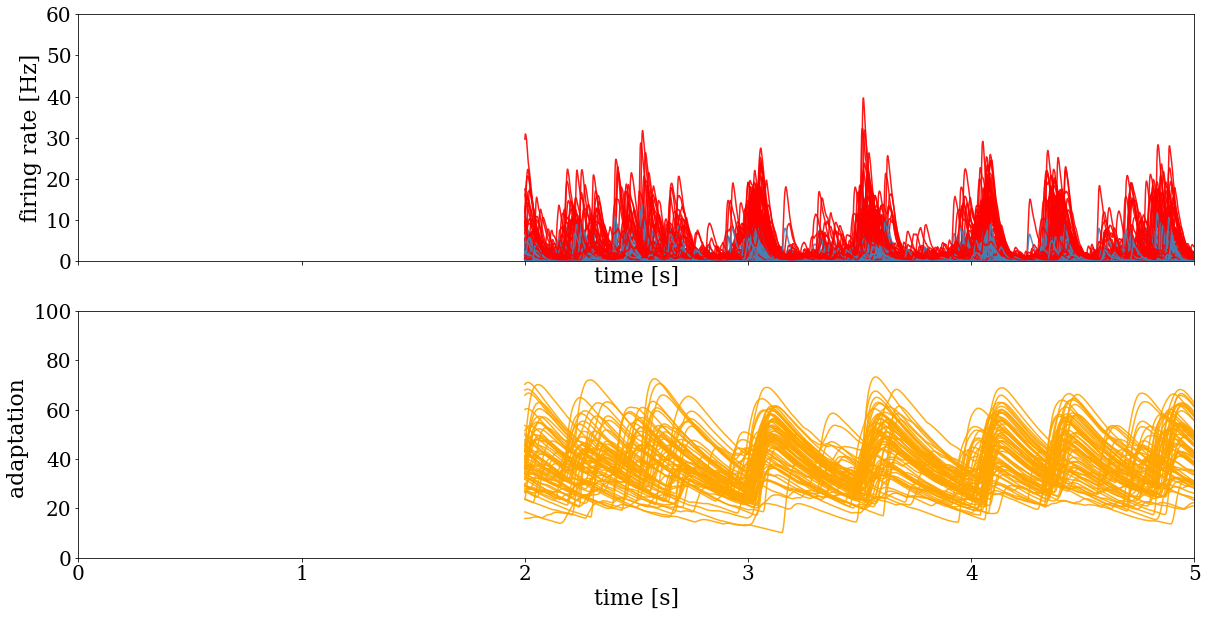

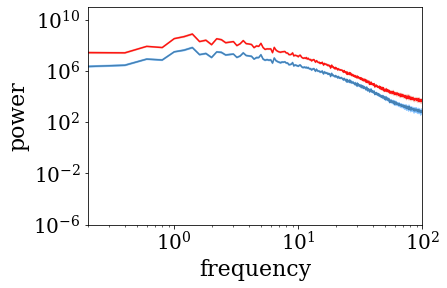

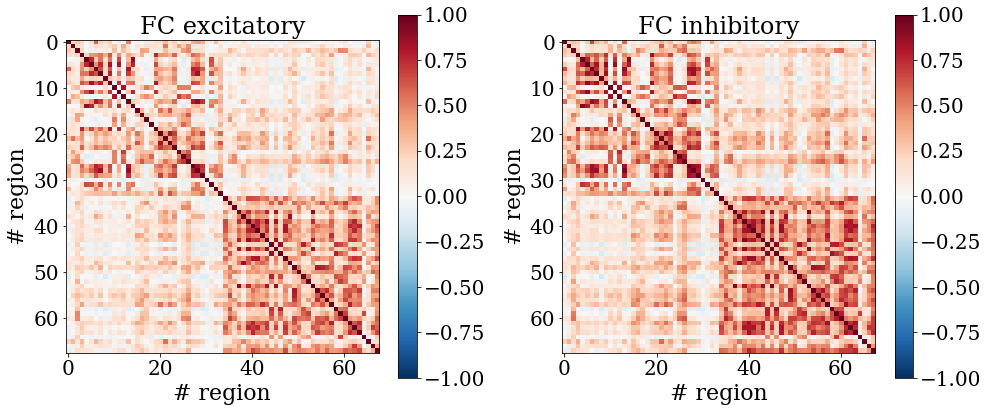

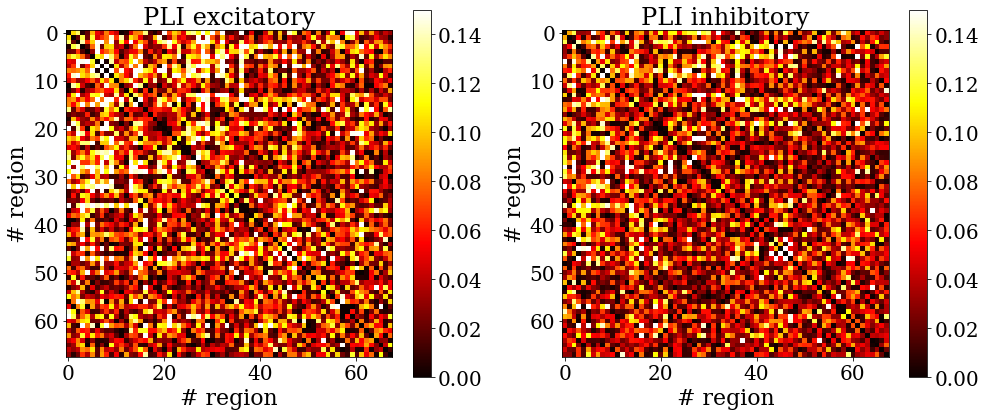

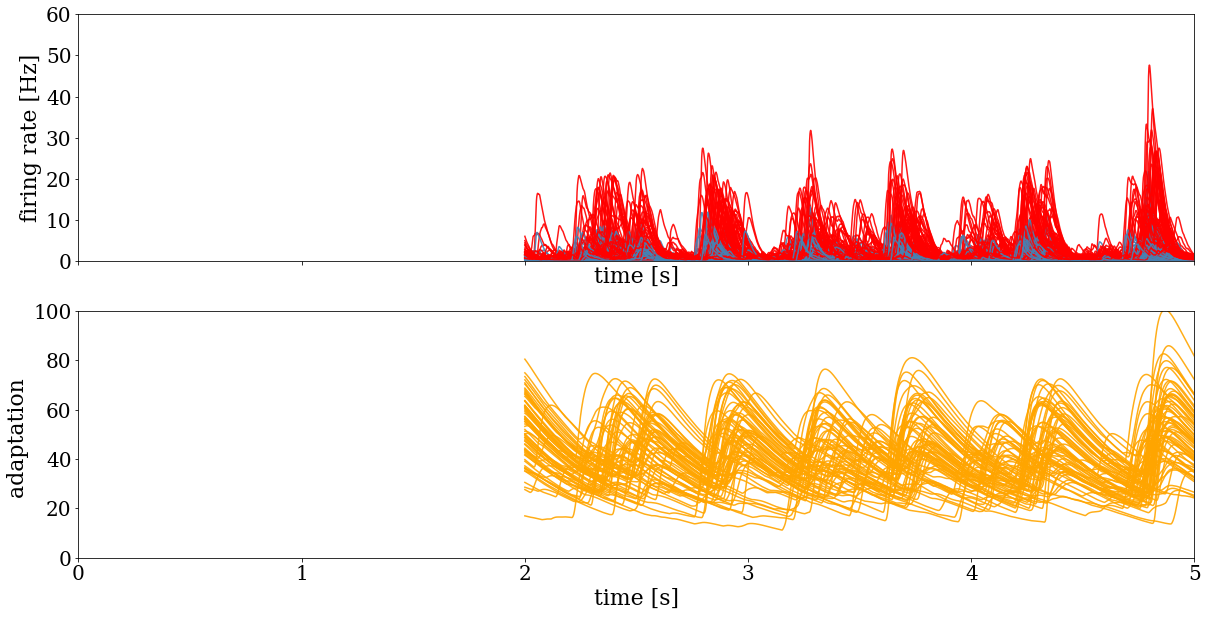

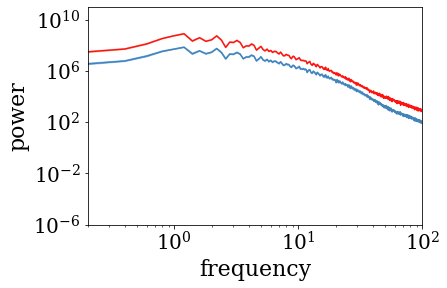

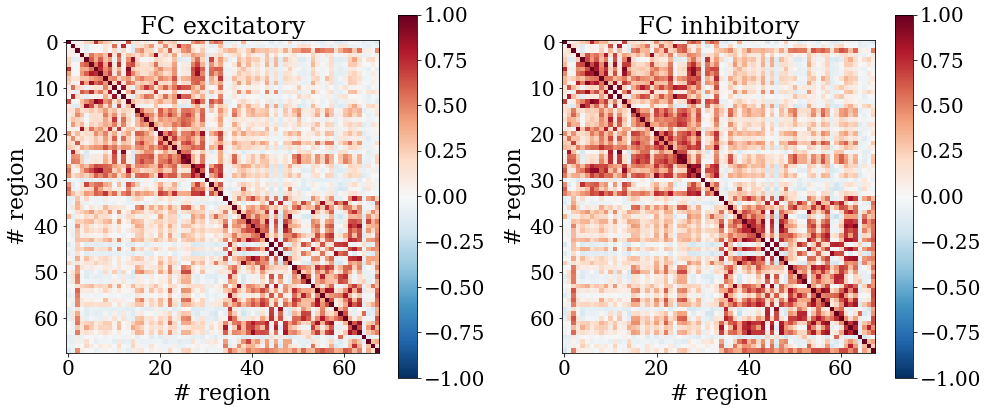

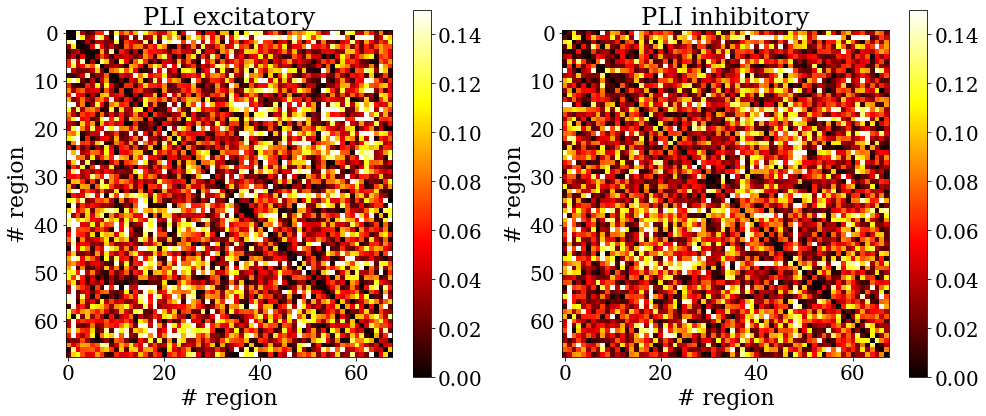

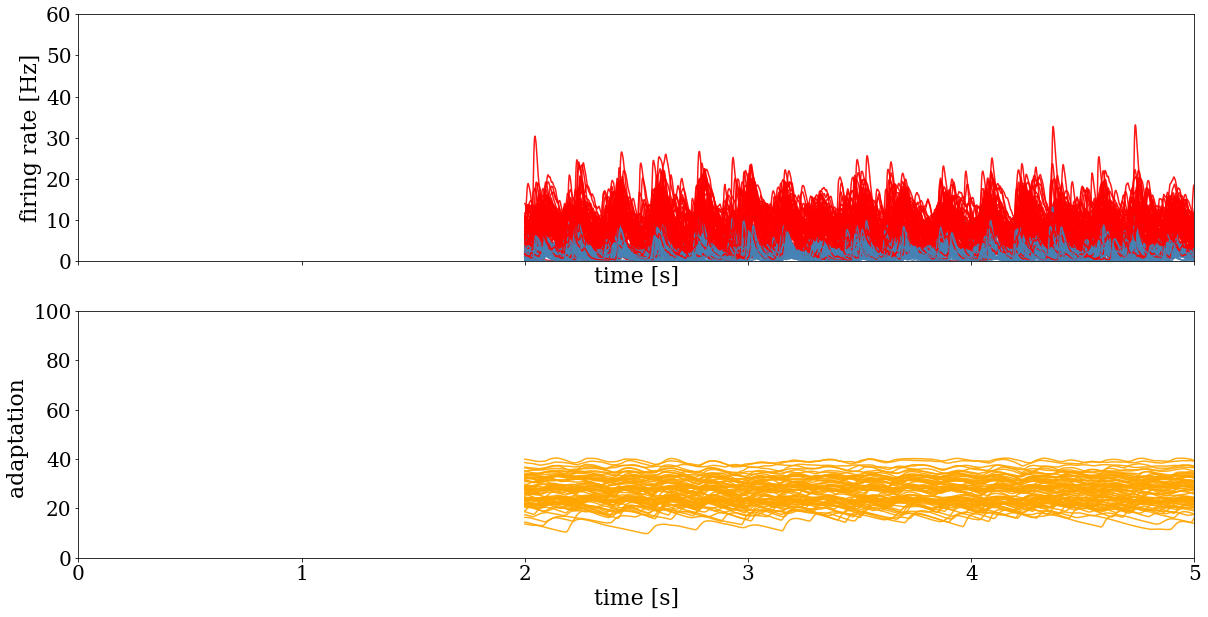

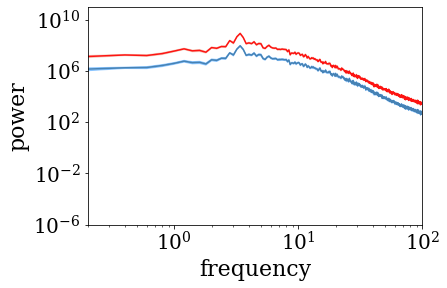

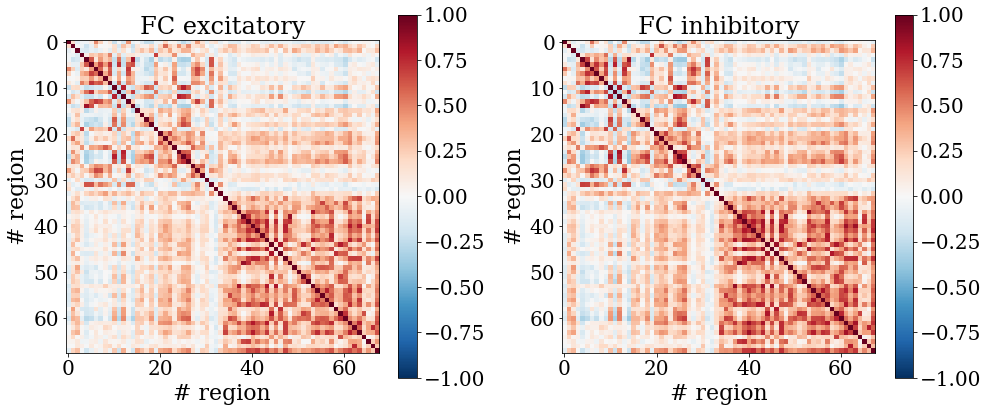

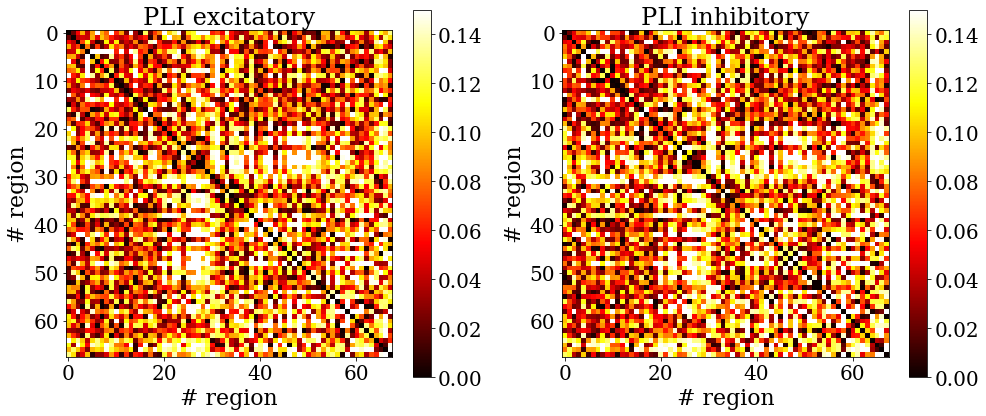

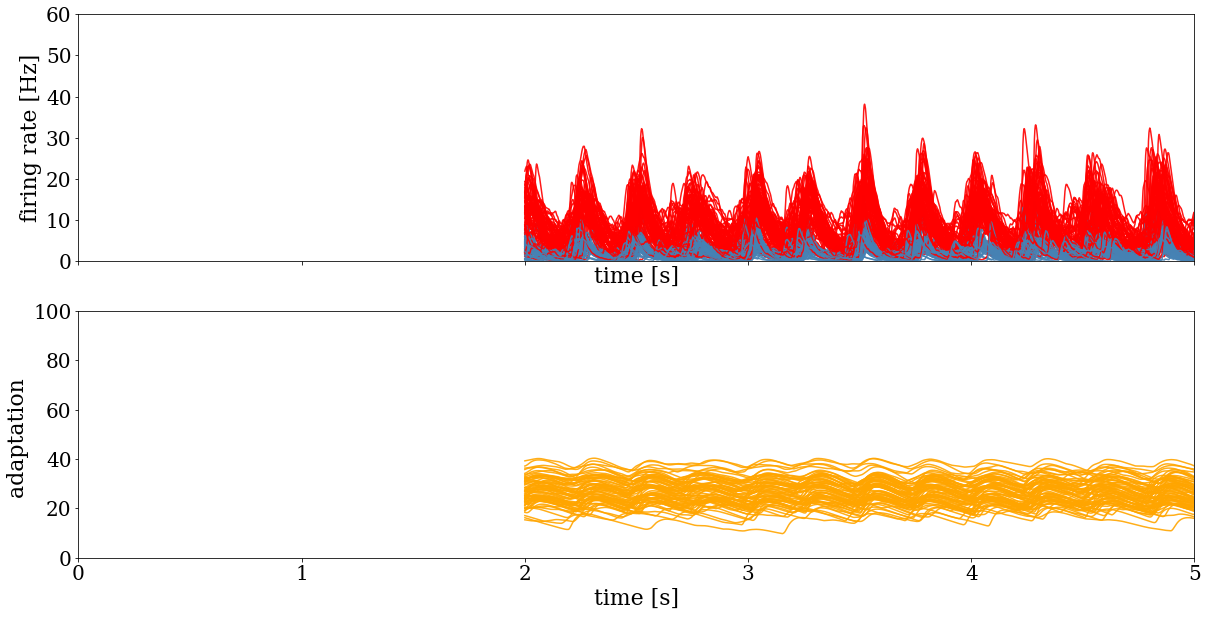

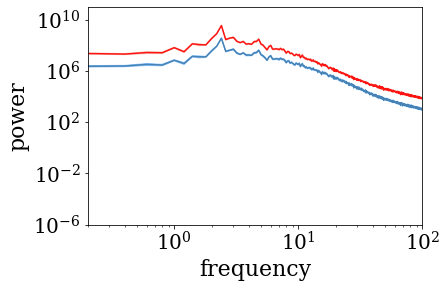

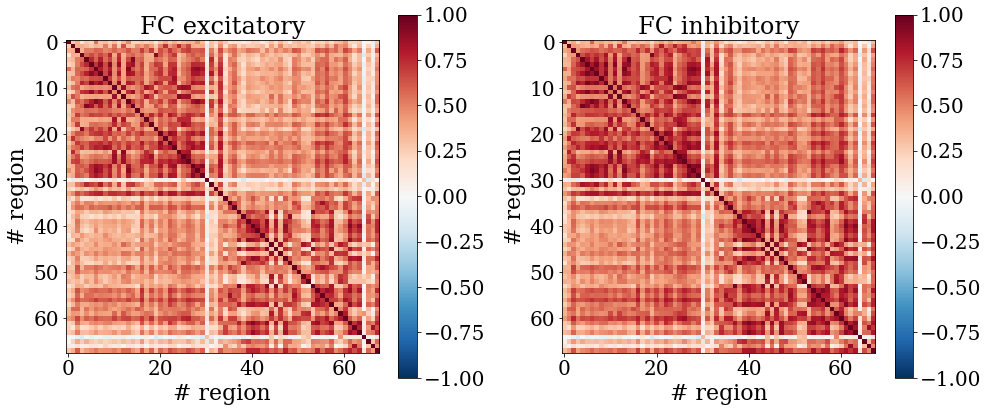

In [ ]:
cut_transient = 2000 #time to discard after initialization
end = 5000
nnodes = 68
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


figure_folder_all = './figures/poster_FENS/'

for file in os.scandir('/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh1/ELI_-64_ELE_-64/'):
    if ('_a_0.0' in file.name) or ('_T_12' in file.name):
        continue
    else:
        figure_folder = figure_folder_all + file.name
        # Make a folder for each parameter combination
        try:
            os.listdir(figure_folder)
        except:
            os.mkdir(figure_folder)
            
        # Load results
        result = tools.get_result(file.path,cut_transient+0.1,end)
        # Variables
        times = result[0][0]
        rateE = result[0][1][:,0,:]
        rateI = result[0][1][:,1,:]
        adaptationE = result[0][1][:,5,:]
        
        Esig = np.transpose(rateE)*1e3 #KHz to Hz
        Isig = np.transpose(rateI)*1e3
        AdpE = np.transpose(adaptationE)
        time_s = times*1e-3 #from ms to sec
        
        # Time traces figure
        fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)
        plt.rcParams.update({'font.size': 14})

        for e_node in range(nnodes):
            ax0.plot(time_s,Isig[e_node], '-r', alpha=0.9)
            ax0.plot(time_s,Esig[e_node], color='SteelBlue', alpha=0.9) 
        ax0.set_xlabel('time [s]')
        ax0.set_ylabel('firing rate [Hz]')  
        ax0.set_ylim(ymax=60,ymin=0.)
        ax0.set_xlim(xmax=5., xmin=2.)

        for e_node in range(nnodes):
            ax1.plot(time_s,AdpE[e_node], color='#FFA500', alpha=0.9) 
        ax1.set_xlabel('time [s]')
        ax1.set_ylabel('adaptation ')  
        ax1.set_ylim(ymax=100,ymin=0.)
        plt.savefig(figure_folder + '/time_traces.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Now PSD
        plt.rcParams.update({'font.size': 14})
        # plot power spectrum mean over regions and std
        f_sampling = 1.*len(time_s)/time_s[-1] # time in seconds, f_sampling in Hz
        frq = np.fft.fftfreq(len(times), 1/f_sampling)

        # Excitatory
        pwr_region_E = []
        for e_reg in range(nnodes):
            pwr_region_E.append(np.abs(np.fft.fft(Esig[e_reg]))**2)

        mean_fft_overregions_E = np.mean(pwr_region_E, axis=0)
        mean_E_Hz = mean_fft_overregions_E
        plt.loglog(frq[frq > 0], mean_E_Hz[frq > 0], color='SteelBlue')
        std_e = np.std(pwr_region_E, axis=0) #std fft between regions
        high_e = mean_E_Hz[frq > 0]+std_e[frq > 0]/np.sqrt(nnodes)
        low_e =  mean_E_Hz[frq > 0]-std_e[frq > 0]/np.sqrt(nnodes)
        plt.fill_between(frq[frq > 0], high_e, low_e, color = 'DodgerBlue', alpha = 0.4)

        # Inhibitory
        pwr_region_I = []
        for i_reg in range(nnodes):
            pwr_region_I.append(np.abs(np.fft.fft(Isig[i_reg]))**2)

        mean_fft_overregions_I = np.mean(pwr_region_I, axis=0)
        mean_I_Hz = mean_fft_overregions_I
        plt.loglog(frq[frq > 0], mean_I_Hz[frq > 0], '-r', alpha=0.9)
        std_i = np.std(pwr_region_I, axis=0) #std fft between regions
        high_i = mean_I_Hz[frq > 0]+std_i[frq > 0]/np.sqrt(nnodes)
        low_i =  mean_I_Hz[frq > 0]-std_i[frq > 0]/np.sqrt(nnodes)
        plt.fill_between(frq[frq > 0], high_i, low_i, color = 'DarkSalmon', alpha = 0.4)

        plt.xlabel('frequency')
        #plt.xlabel(r'$\nu_E [Hz]$')
        plt.ylabel('power')  
        plt.xlim(np.amin(frq[frq > 0]), 100)
        plt.ylim(10e-7, 10e10)
        #plt.legend(['excitatory', 'inhibitory'])
        plt.savefig(figure_folder + '/PSD.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Now FC
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
        plt.rcParams.update({'font.size': 14})
        pearson_e = np.corrcoef(Esig)
        im0 = ax0.imshow(pearson_e, cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest')
        fig.colorbar(im0, ax=ax0)
        ax0.set_xlabel('# region')
        ax0.set_ylabel('# region') 
        ax0.set_title('FC excitatory')

        #inhibitory
        pearson_i = np.corrcoef(Isig)
        im1 = ax1.imshow(pearson_i, cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest')
        fig.colorbar(im1, ax=ax1)
        ax1.set_xlabel('# region')
        ax1.set_ylabel('# region') 
        ax1.set_title('FC inhibitory')
        plt.tight_layout()
        plt.savefig(figure_folder + '/FC_e_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        # Finally PLI
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
        plt.rcParams.update({'font.size': 14})
        #excitatory
        hilb_phase_region_e = np.zeros_like(Esig)
        PLI_e = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_e = np.zeros_like(Esig)
        hilb_phase_region_e = np.zeros_like(Esig)

        for e_reg in range(nnodes):
            hilb = signal.hilbert(Esig[e_reg])
            hilb_amplitude_region_e[e_reg] = np.abs(hilb)
            hilb_phase_region_e[e_reg] = np.angle(hilb)

        for e_reg in range(nnodes):
            for j_reg in range(e_reg, nnodes):
                phase_lags = hilb_phase_region_e[e_reg] \
                - hilb_phase_region_e[j_reg]
                PLI_e[e_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_e[j_reg][e_reg] = PLI_e[e_reg][j_reg]

        im0 = ax0.imshow(PLI_e, cmap = 'hot', vmin = 0, vmax = 0.15, 
                   interpolation = 'nearest')
        fig.colorbar(im0, ax=ax0)
        ax0.set_xlabel('# region')
        ax0.set_ylabel('# region') 
        ax0.set_title('PLI excitatory')

        #inhibitory
        hilb_phase_region_i = np.zeros_like(Isig)
        PLI_i = np.zeros((nnodes, nnodes))

        hilb_amplitude_region_i = np.zeros_like(Isig)
        hilb_phase_region_i = np.zeros_like(Isig)

        for i_reg in range(nnodes):
            hilb = signal.hilbert(Isig[i_reg])
            hilb_amplitude_region_i[i_reg] = np.abs(hilb)
            hilb_phase_region_i[i_reg] = np.angle(hilb)

        for i_reg in range(nnodes):
            for j_reg in range(i_reg, nnodes):
                phase_lags = hilb_phase_region_i[i_reg] \
                - hilb_phase_region_i[j_reg]
                PLI_i[i_reg][j_reg] = np.abs(np.mean(np.sign(phase_lags)))
                PLI_i[j_reg][i_reg] = PLI_i[i_reg][j_reg]

        im1 = ax1.imshow(PLI_i, cmap = 'hot', vmin = 0, vmax = 0.15, 
                   interpolation = 'nearest')
        fig.colorbar(im1, ax=ax1)
        ax1.set_xlabel('# region')
        ax1.set_ylabel('# region') 
        ax1.set_title('PLI inhibitory')
        plt.tight_layout()
        plt.savefig(figure_folder + '/PLI_e_i.pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        
        del result, phase_lags, pwr_region_E, pwr_region_I, times, rateE, rateI, Esig, Isig, hilb_phase_region_e, hilb_phase_region_i
        del hilb_amplitude_region_e, hilb_amplitude_region_i, hilb

In [3]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

       hilb_amplitude_region_e: 15.6 MiB
       hilb_amplitude_region_i: 15.6 MiB
                          Esig: 15.6 MiB
                          Isig: 15.6 MiB
                          hilb: 468.9 KiB
                        time_s: 234.5 KiB
                           frq: 234.5 KiB
        mean_fft_overregions_E: 234.5 KiB
                     mean_E_Hz: 234.5 KiB
                         std_e: 234.5 KiB
